In [178]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from PIL import Image
from scipy.stats import pearsonr
from colorama import Fore
from rasterio.features import geometry_mask
from shapely.geometry import Polygon, mapping

In [291]:
print("Coucou")

Coucou


In [179]:
gdf=gpd.read_file("Base_De_Donnees.gpkg")
print(gdf)

       id Points GPS   Photo Légende Zone  \
0   303.0        NaN     303     NaN   Z3   
1   305.0        NaN     305     NaN   Z3   
2   310.0        NaN     310     NaN   Z3   
3   313.0        NaN     313     NaN   Z3   
4     5.0      5 à 8  151932     NaN   Z5   
..    ...        ...     ...     ...  ...   
74    NaN        NaN     NaN     NaN  NaN   
75    NaN        NaN     NaN     NaN  NaN   
76    NaN        NaN     NaN     NaN  NaN   
77    1.0        NaN     NaN     NaN  NaN   
78    2.0        NaN     NaN     NaN  NaN   

                                Remarque  Recouvre  Hauteur     layer  \
0                              graminées      70.0      NaN  classe_3   
1   Genêts coupés + graminées + sols nus      70.0      NaN  classe_3   
2                              graminées       NaN      NaN  classe_3   
3       graminées (~20 cm) + échantillon      80.0      0.2  classe_3   
4                      Pelouse sèche <1m      80.0      0.8  classe_3   
..                   

In [180]:
#mon_raster=rasterio.open("DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq")

In [181]:
# Ouvrir le fichier raster avec rasterio
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq', 'r') as rst:
    # Extraire les valeurs du raster pour chaque point de la couche géométrique
    liste=[]
    for index, row in gdf.iterrows():
        # Extraire les coordonnées du point
        multipolygon= row['geometry']
        # Extraire les valeurs du raster pour le point
        vals = rst.sample([(multipolygon)])
        liste.append(multipolygon)
        
        # Afficher les valeurs extraites
        # print(f"Point {index+1} - Coordonnées : ({position}) - Valeurs : {vals}")

print(multipolygon)
print(liste)
print(len(multipolygon.geoms))
polygon=multipolygon.geoms[0]
coords=polygon.exterior.coords
print("")
print(coords)

MULTIPOLYGON (((450239.9959124512 4795490.0039624525, 450260.28108531 4795489.743895806, 450259.8866220774 4795469.593006086, 450240.0044670404 4795469.853243241, 450239.9959124512 4795490.0039624525)))
[<MULTIPOLYGON (((450649.457 4795630.721, 450640.192 4795630.637, 450640.31 4...>, <MULTIPOLYGON (((450620.264 4795760.111, 450660.13 4795760.011, 450659.599 4...>, <MULTIPOLYGON (((450459.914 4795840.194, 450460.082 4795860.069, 450479.956 ...>, <MULTIPOLYGON (((450300.126 4795880.101, 450320.001 4795879.807, 450320.009 ...>, <MULTIPOLYGON (((450469.725 4795590.613, 450469.6 4795599.753, 450489.82 479...>, <MULTIPOLYGON (((450429.704 4795580.121, 450420.189 4795580.159, 450420.05 4...>, <MULTIPOLYGON (((450280.266 4795660.23, 450280.197 4795679.863, 450299.951 4...>, <MULTIPOLYGON (((450240.048 4795700.063, 450260.216 4795700.013, 450260.176 ...>, <MULTIPOLYGON (((450319.935 4795580.234, 450320.161 4795600.167, 450339.977 ...>, <MULTIPOLYGON (((450179.829 4795519.897, 450170.357 479552

In [182]:
print(gdf['geometry'])

0     MULTIPOLYGON (((450649.457 4795630.721, 450640...
1     MULTIPOLYGON (((450620.264 4795760.111, 450660...
2     MULTIPOLYGON (((450459.914 4795840.194, 450460...
3     MULTIPOLYGON (((450300.126 4795880.101, 450320...
4     MULTIPOLYGON (((450469.725 4795590.613, 450469...
                            ...                        
74    MULTIPOLYGON (((450420.734 4796270.681, 450448...
75    MULTIPOLYGON (((450589.690 4796131.144, 450589...
76    MULTIPOLYGON (((450579.223 4796080.158, 450578...
77    MULTIPOLYGON (((450140.118 4795719.915, 450140...
78    MULTIPOLYGON (((450239.996 4795490.004, 450260...
Name: geometry, Length: 79, dtype: geometry


In [183]:
print(gdf['Class'])

0     3
1     3
2     3
3     3
4     3
     ..
74    2
75    2
76    2
77    6
78    6
Name: Class, Length: 79, dtype: int64


In [184]:
print(gdf['Remarque'])

0                                graminées
1     Genêts coupés + graminées + sols nus
2                                graminées
3         graminées (~20 cm) + échantillon
4                        Pelouse sèche <1m
                      ...                 
74                                     NaN
75                                     NaN
76                                     NaN
77                                     NaN
78                                     NaN
Name: Remarque, Length: 79, dtype: object


In [185]:
print(gdf.iloc[0])

id                                                        303.0
Points GPS                                                  NaN
Photo                                                       303
Légende                                                     NaN
Zone                                                         Z3
Remarque                                              graminées
Recouvre                                                   70.0
Hauteur                                                     NaN
layer                                                  classe_3
path                    D:/Stage-2021/QGIS/classes/classe_3.shp
Tableau_re                                                  NaN
Tableau__1                                                  NaN
Class                                                         3
geometry      MULTIPOLYGON (((450649.4569069783 4795630.7205...
Name: 0, dtype: object


In [186]:
print(gdf.iloc[0]['geometry'])

MULTIPOLYGON (((450649.4569069783 4795630.720539262, 450640.1917257187 4795630.63706916, 450640.31044948637 4795639.849606689, 450679.7540509028 4795639.917163798, 450679.4308546487 4795620.78126369, 450649.5821121304 4795620.620656988, 450649.4569069783 4795630.720539262)))


In [187]:
poly=gdf.iloc[0]['geometry'].geoms[0]
sommets=list(poly.exterior.coords)
print(sommets)
print(sommets[0])

[(450649.4569069783, 4795630.720539262), (450640.1917257187, 4795630.63706916), (450640.31044948637, 4795639.849606689), (450679.7540509028, 4795639.917163798), (450679.4308546487, 4795620.78126369), (450649.5821121304, 4795620.620656988), (450649.4569069783, 4795630.720539262)]
(450649.4569069783, 4795630.720539262)


In [188]:
# Lire l'image raster avec rasterio
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    
    # Créer un objet shapely à partir d'un polygone
    poly=gdf.iloc[0]['geometry'].geoms[0]
        #poly2=gdf.iloc[78]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
        #poly2_transformed = mapping(poly2)
    
    # Convertir le polygone en coordonnées de pixels
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        #poly2_pixels = rasterio.features.geometry_mask([poly2_transformed], out_shape=(height, width), transform=transform, invert=True)
    # Lire les valeurs de pixels à l'intérieur du polygone
    image = src.read(1, masked=True)
    pixels_inside_poly = image[poly_pixels]
       # pixels2_inside_poly = image[poly2_pixels] 

indiceTrue=np.where(poly_pixels==True)
#print(np.shape(poly_pixels))

In [189]:
#Classés par fid 
#coordpixel : les coordonnées des pixels (en premier les y et après les x)
#bande_rouge : valeurs des supposées longueurs d'ondes dans le rouge des pixels.
#bande_infrarouge: valeurs des supposées lonfueurs d'ondes au niveau infra_rouge.

### Calcul NDVI et PSRI

In [277]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel=[]
    bande_rouge=[]
    bande_verte=[]
    bande_infrarouge=[]
    bande_RE1=[]
    bande_RE2=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)

        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)

        coordpixel.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
       
     #le numéro dans le image correspond à la bande choisie
        #pour la bande rouge choisir la bande 3
    
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte.append(pixels_inside_poly3)

        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2.append(pixels_inside_poly5)

In [278]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel16=[]
    bande_rouge16=[]
    bande_infrarouge16=[]
    bande_verte16=[]
    bande_RE116=[]
    bande_RE216=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)

        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)

        coordpixel16.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
       
        #le numéro dans le image correspond à la bande choisie
        #pour la bande rouge choisir la bande 3
    
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge16.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)  #comparer avec la 7 (la 4 est plus fine en largeur spectrale)
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge16.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte16.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE116.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE216.append(pixels_inside_poly5)
    

In [279]:
with rasterio.open('SENTINEL2A_20200825-104903-378_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel=[]
    bande_rouge_2=[]
    bande_verte_2=[]
    bande_infrarouge_2=[]
    bande_RE1_2=[]
    bande_RE2_2=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)

        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)

        coordpixel.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
       
        #le numéro dans le image correspond à la bande choisie
        #pour la bande rouge choisir la bande 3
    
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_2.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_2.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_2.append(pixels_inside_poly3)

        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_2.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_2.append(pixels_inside_poly5)

In [280]:
with rasterio.open("SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq") as src:
     # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel16_2=[]
    bande_rouge16_2=[]
    bande_infrarouge16_2=[]
    bande_verte16_2=[]
    bande_RE116_2=[]
    bande_RE216_2=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)

        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)

        coordpixel16_2.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
       
        #le numéro dans le image correspond à la bande choisie
        #pour la bande rouge choisir la bande 3
    
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge16_2.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)  #comparer avec la 7 (la 4 est plus fine en largeur spectrale)
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge16_2.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte16_2.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE116_2.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE216_2.append(pixels_inside_poly5)
    

In [281]:
with rasterio.open("SENTINEL2A_20170516-105322-634_L2A_T31TDJ_D_V1-4_FRE_extrait_stack_gain.bsq") as src:
     # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel17=[]
    bande_rouge17=[]
    bande_infrarouge17=[]
    bande_verte17=[]
    bande_RE117=[]
    bande_RE217=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)

        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)

        coordpixel16.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
       
        #le numéro dans le image correspond à la bande choisie
        #pour la bande rouge choisir la bande 3
    
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge17.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)  #comparer avec la 7 (la 4 est plus fine en largeur spectrale)
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge17.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte17.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE117.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE217.append(pixels_inside_poly5)
    

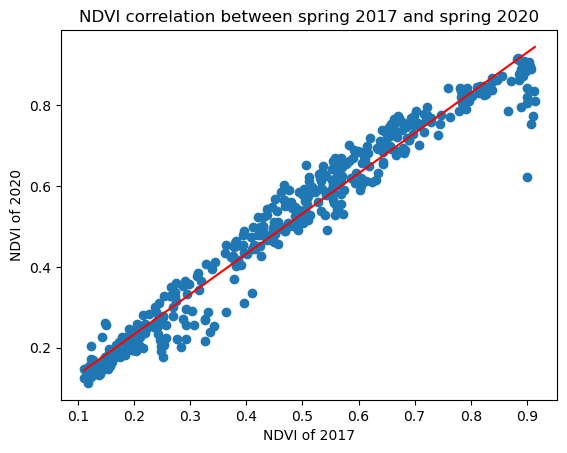

La corrélation entre la liste des coefficient NDVI de 2017 et la liste des coefficient NDVI de 2020 est : 0.98


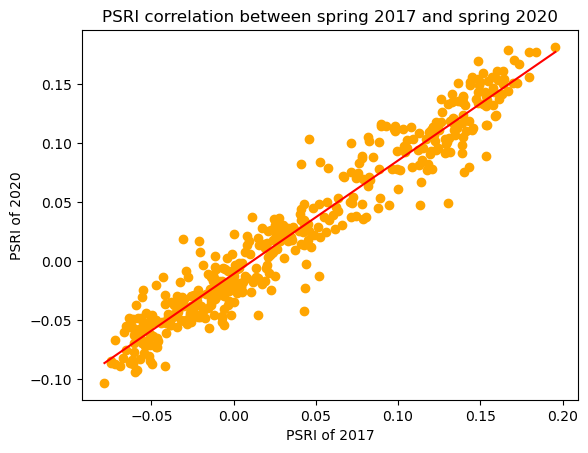

La corrélation entre la liste des coefficient PSRI de 2017 et la liste des coefficient PSRI de 2020 est : 0.967


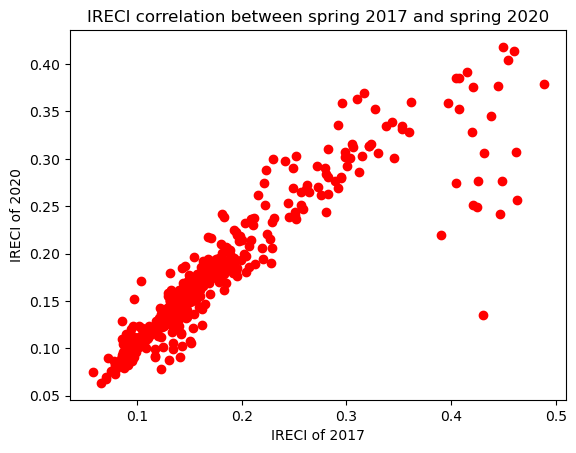

La corrélation entre la liste des coefficient IRECI de 2017 et la liste des coefficient IRECI de 2020 est : 0.914


In [283]:
ndvi17=[]
ndvi20=[]
PSRI20=[]
PSRI17=[]
IRECI17=[]
IRECI20=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        ndvi17.append( (bande_infrarouge17[i][j] - bande_rouge17[i][j]) / (bande_infrarouge17[i][j] + bande_rouge17[i][j]))
        ndvi20.append((bande_infrarouge[i][j] - bande_rouge[i][j]) / (bande_infrarouge[i][j] + bande_rouge[i][j]))
        PSRI20.append((bande_rouge[i][j]-bande_verte[i][j])/bande_infrarouge[i][j])
        PSRI17.append((bande_rouge17[i][j]-bande_verte17[i][j])/bande_infrarouge17[i][j])
        IRECI20.append((bande_infrarouge[i][j] - bande_rouge[i][j])/(bande_RE1[i][j]/bande_RE2[i][j]))
        IRECI17.append((bande_infrarouge17[i][j] - bande_rouge17[i][j])/(bande_RE117[i][j]/bande_RE217[i][j]))
ndvi17=np.array(ndvi17)
ndvi20=np.array(ndvi20)
coefficients_ndvi_17_20 = np.polyfit(ndvi17, ndvi20, 1)

x_reg_ndvi_17_20 = np.linspace(ndvi17.min(), ndvi17.max(), len(ndvi17))
y_reg_ndvi_17_20 = np.polyval(coefficients_ndvi_17_20, x_reg_ndvi)

Corr_matrixNDVI=np.corrcoef(ndvi17,ndvi20)
Corr_matrixPSRI=np.corrcoef(PSRI17,PSRI20)
Corr_matrixIRECI=np.corrcoef(IRECI17,IRECI20)

plt.scatter(ndvi17,ndvi20)
plt.plot(x_reg_ndvi_17_20, y_reg_ndvi_17_20, color='r')
plt.xlabel('NDVI of 2017')
plt.ylabel('NDVI of 2020')
plt.title('NDVI correlation between spring 2017 and spring 2020')
plt.show()
CorrNDVI=round(Corr_matrixNDVI[0,1],3)
print("La corrélation entre la liste des coefficient NDVI de 2017 et la liste des coefficient NDVI de 2020 est :", CorrNDVI)

PSRI17=np.array(PSRI17)
PSRI20=np.array(PSRI20)
coefficients_psri_17_20 = np.polyfit(PSRI17, PSRI20, 1)
x_reg_PSRI_17_20 = np.linspace(PSRI17.min(), PSRI17.max(), len(PSRI17))
y_reg_PSRI_17_20 = np.polyval(coefficients_psri_17_20, x_reg_PSRI)
### y_reg_PSRI = np.polyval(coefficients_PSRI, x_reg_PSRI)

plt.scatter(PSRI17,PSRI20,c='orange')
plt.plot(x_reg_PSRI_17_20, y_reg_PSRI_17_20, color='r')
plt.xlabel('PSRI of 2017')
plt.ylabel('PSRI of 2020')
plt.title('PSRI correlation between spring 2017 and spring 2020')
plt.show()
CorrPSRI=round(Corr_matrixPSRI[0,1],3)
print("La corrélation entre la liste des coefficient PSRI de 2017 et la liste des coefficient PSRI de 2020 est :", CorrPSRI)

plt.scatter(IRECI17,IRECI20,c='red')
plt.xlabel('IRECI of 2017')
plt.ylabel('IRECI of 2020')
plt.title('IRECI correlation between spring 2017 and spring 2020')
plt.show()
CorrIRECI=round(Corr_matrixIRECI[0,1],3)
print("La corrélation entre la liste des coefficient IRECI de 2017 et la liste des coefficient IRECI de 2020 est :", CorrIRECI)

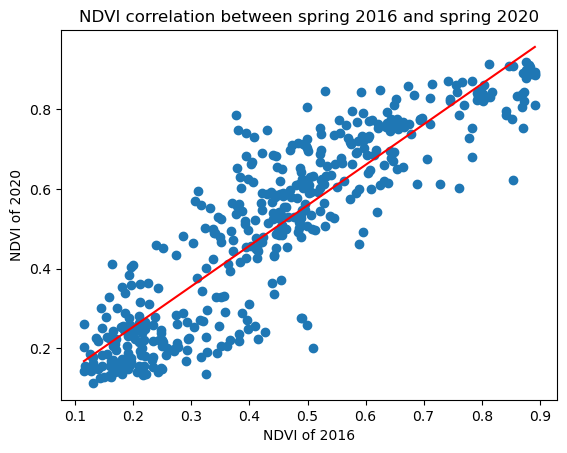

La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020 est : 0.89


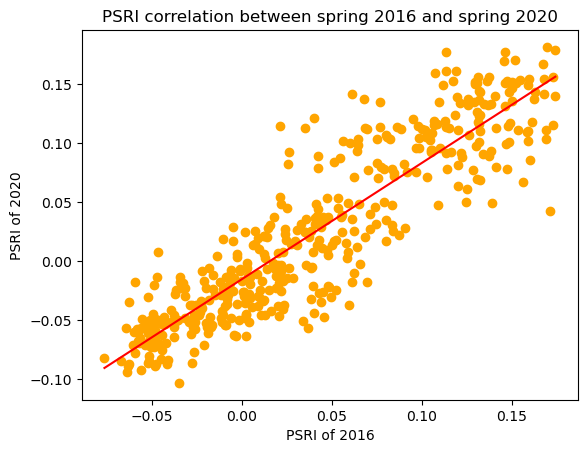

La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020 est : 0.9


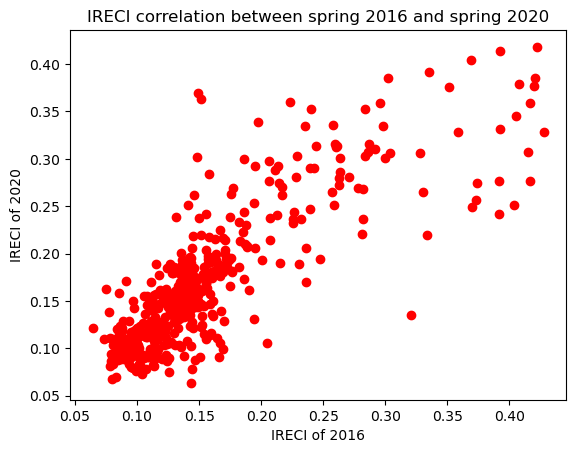

La corrélation entre la liste des coefficient IRECI de 2016 et la liste des coefficient IRECI de 2020 est : 0.819


In [284]:
ndvi16=[]
ndvi20=[]
PSRI20=[]
PSRI16=[]
IRECI16=[]
IRECI20=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        ndvi16.append( (bande_infrarouge16[i][j] - bande_rouge16[i][j]) / (bande_infrarouge16[i][j] + bande_rouge16[i][j]))
        ndvi20.append((bande_infrarouge[i][j] - bande_rouge[i][j]) / (bande_infrarouge[i][j] + bande_rouge[i][j]))
        PSRI20.append((bande_rouge[i][j]-bande_verte[i][j])/bande_infrarouge[i][j])
        PSRI16.append((bande_rouge16[i][j]-bande_verte16[i][j])/bande_infrarouge16[i][j])
        IRECI20.append((bande_infrarouge[i][j] - bande_rouge[i][j])/(bande_RE1[i][j]/bande_RE2[i][j]))
        IRECI16.append((bande_infrarouge16[i][j] - bande_rouge16[i][j])/(bande_RE116[i][j]/bande_RE216[i][j]))
ndvi16=np.array(ndvi16)
ndvi20=np.array(ndvi20)
coefficients_ndvi = np.polyfit(ndvi16, ndvi20, 1)

x_reg_ndvi = np.linspace(ndvi16.min(), ndvi16.max(), len(ndvi16))
y_reg_ndvi = np.polyval(coefficients_ndvi, x_reg_ndvi)

Corr_matrixNDVI=np.corrcoef(ndvi16,ndvi20)
Corr_matrixPSRI=np.corrcoef(PSRI16,PSRI20)
Corr_matrixIRECI=np.corrcoef(IRECI16,IRECI20)

plt.scatter(ndvi16,ndvi20)
plt.plot(x_reg_ndvi, y_reg_ndvi, color='r')
plt.xlabel('NDVI of 2016')
plt.ylabel('NDVI of 2020')
plt.title('NDVI correlation between spring 2016 and spring 2020')
plt.show()
CorrNDVI=round(Corr_matrixNDVI[0,1],3)
print("La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020 est :", CorrNDVI)

PSRI16=np.array(PSRI16)
PSRI20=np.array(PSRI20)
coefficients_psri = np.polyfit(PSRI16, PSRI20, 1)
x_reg_PSRI = np.linspace(PSRI16.min(), PSRI16.max(), len(PSRI16))
y_reg_PSRI = np.polyval(coefficients_psri, x_reg_PSRI)
### y_reg_PSRI = np.polyval(coefficients_PSRI, x_reg_PSRI)

plt.scatter(PSRI16,PSRI20,c='orange')
plt.plot(x_reg_PSRI, y_reg_PSRI, color='r')
plt.xlabel('PSRI of 2016')
plt.ylabel('PSRI of 2020')
plt.title('PSRI correlation between spring 2016 and spring 2020')
plt.show()
CorrPSRI=round(Corr_matrixPSRI[0,1],3)
print("La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020 est :", CorrPSRI)

plt.scatter(IRECI16,IRECI20,c='red')
plt.xlabel('IRECI of 2016')
plt.ylabel('IRECI of 2020')
plt.title('IRECI correlation between spring 2016 and spring 2020')
plt.show()
CorrIRECI=round(Corr_matrixIRECI[0,1],3)
print("La corrélation entre la liste des coefficient IRECI de 2016 et la liste des coefficient IRECI de 2020 est :", CorrIRECI)

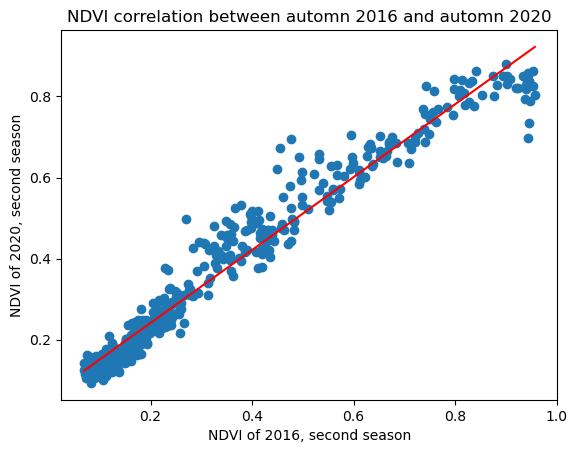

Pour la seconde saison, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020 est : 0.979


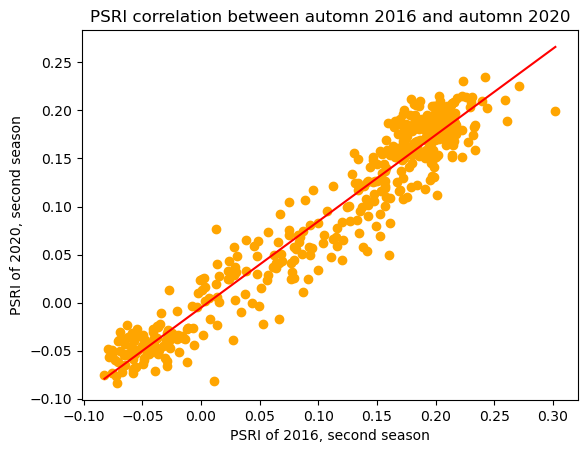

Pour la seconde saison, la corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020 est : 0.964


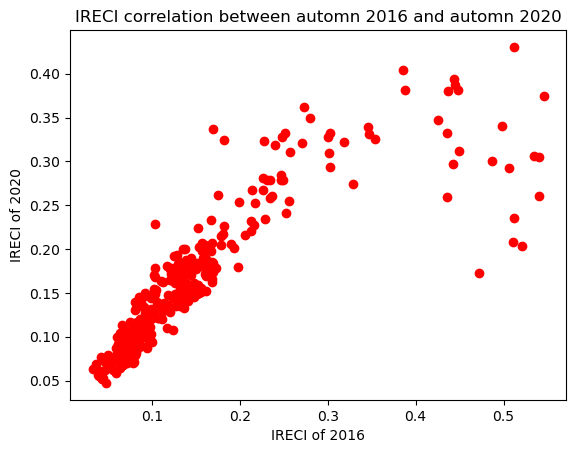

Pour la seconde saison, la corrélation entre la liste des coefficient IRECI de 2016 et la liste des coefficient IRECI de 2020 est : 0.863


In [285]:
ndvi16_2=[]
ndvi20_2=[]
PSRI20_2=[]
PSRI16_2=[]
IRECI16_2=[]
IRECI20_2=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        ndvi16_2.append( (bande_infrarouge16_2[i][j] - bande_rouge16_2[i][j]) / (bande_infrarouge16_2[i][j] + bande_rouge16_2[i][j]))
        ndvi20_2.append((bande_infrarouge_2[i][j] - bande_rouge_2[i][j]) / (bande_infrarouge_2[i][j] + bande_rouge_2[i][j]))
        PSRI20_2.append((bande_rouge_2[i][j]-bande_verte_2[i][j])/bande_infrarouge_2[i][j])
        PSRI16_2.append((bande_rouge16_2[i][j]-bande_verte16_2[i][j])/bande_infrarouge16_2[i][j])
        IRECI20_2.append((bande_infrarouge_2[i][j] - bande_rouge_2[i][j])/(bande_RE1_2[i][j]/bande_RE2_2[i][j]))
        IRECI16_2.append((bande_infrarouge16_2[i][j] - bande_rouge16_2[i][j])/(bande_RE116_2[i][j]/bande_RE216_2[i][j]))
ndvi16_2=np.array(ndvi16_2)
ndvi20_2=np.array(ndvi20_2)
coefficients_ndvi_2 = np.polyfit(ndvi16_2, ndvi20_2, 1)

x_reg_ndvi_2 = np.linspace(ndvi16_2.min(), ndvi16_2.max(), len(ndvi16_2))
y_reg_ndvi_2 = np.polyval(coefficients_ndvi_2, x_reg_ndvi_2)

Corr_matrixNDVI_2=np.corrcoef(ndvi16_2,ndvi20_2)
Corr_matrixPSRI_2=np.corrcoef(PSRI16_2,PSRI20_2)
Corr_matrixIRECI_2=np.corrcoef(IRECI16_2,IRECI20_2)

plt.scatter(ndvi16_2,ndvi20_2)
plt.plot(x_reg_ndvi_2, y_reg_ndvi_2, color='r')
plt.xlabel('NDVI of 2016, second season')
plt.ylabel('NDVI of 2020, second season')
plt.title('NDVI correlation between automn 2016 and automn 2020')
plt.show()
CorrNDVI_2=round(Corr_matrixNDVI_2[0,1],3)
print("Pour la seconde saison, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020 est :", CorrNDVI_2)

PSRI16_2=np.array(PSRI16_2)
PSRI20_2=np.array(PSRI20_2)
coefficients_psri_2 = np.polyfit(PSRI16_2, PSRI20_2, 1)
x_reg_PSRI_2 = np.linspace(PSRI16_2.min(), PSRI16_2.max(), len(PSRI16_2))
y_reg_PSRI_2 = np.polyval(coefficients_psri_2, x_reg_PSRI_2)
### y_reg_PSRI = np.polyval(coefficients_PSRI, x_reg_PSRI)

plt.scatter(PSRI16_2,PSRI20_2,c='orange')
plt.plot(x_reg_PSRI_2, y_reg_PSRI_2, color='r')
plt.xlabel('PSRI of 2016, second season')
plt.ylabel('PSRI of 2020, second season')
plt.title('PSRI correlation between automn 2016 and automn 2020')
plt.show()
CorrPSRI_2=round(Corr_matrixPSRI_2[0,1],3)
print("Pour la seconde saison, la corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020 est :", CorrPSRI_2)

plt.scatter(IRECI16_2,IRECI20_2,c='red')
plt.xlabel('IRECI of 2016')
plt.ylabel('IRECI of 2020')
plt.title('IRECI correlation between automn 2016 and automn 2020')
plt.show()
CorrIRECI_2=round(Corr_matrixIRECI_2[0,1],3)
print("Pour la seconde saison, la corrélation entre la liste des coefficient IRECI de 2016 et la liste des coefficient IRECI de 2020 est :", CorrIRECI_2)

In [196]:
def distance_point_droite(a, b, x0, y0):
    c=(y0+x0/a-b)/(a+1/a)
    distance = np.sqrt((c-x0)**2+((a*c+b)-(y0))**2 )
    return distance

def ordonnées_plus_et_moins(a,b,threshold):
    x1=-a*threshold/np.sqrt(1+a**2)
    y1=(-x1/a)+b
    b1=y1-a*x1
    x2=a*threshold/np.sqrt(1+a**2)
    y2=b-x2/a
    b2=y2-a*x2
    return (b1,b2)

In [197]:
def affichage_ndvi(a,b,threshold):
    distances_ndvi=[]
    for i in range (len(ndvi16)):
        distances_ndvi.append(distance_point_droite(a,b,ndvi16[i],ndvi20[i]))        
    x_threshold_plus=np.linspace(ndvi16.min(), ndvi16.max(), len(ndvi16))
    y_threshold_plus= a* x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x_threshold_moins=np.linspace(ndvi16.min(), ndvi16.max(), len(ndvi16))
    y_threshold_moins= a*x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    ndvi_in_x=[]
    ndvi_out_x=[]
    ndvi_in_y=[]
    ndvi_out_y=[]
    #x_reg_ndvi
    for i in range(len(distances_ndvi)):
        if distances_ndvi[i]>threshold:
            ndvi_out_x.append(ndvi16[i])
            ndvi_out_y.append(ndvi20[i])
        else:
            ndvi_in_x.append(ndvi16[i])
            ndvi_in_y.append(ndvi20[i])
    return(ndvi_in_x,ndvi_out_x,ndvi_in_y,ndvi_out_y,x_threshold_plus,y_threshold_plus,x_threshold_moins,y_threshold_moins,distances_ndvi)

In [198]:
def affichage_psri(a,b,threshold):
    distances_psri=[]
    for i in range (len(PSRI16)):
        distances_psri.append(distance_point_droite(a,b,PSRI16[i],PSRI20[i]))        
    x2_threshold_plus=np.linspace(PSRI16.min(), PSRI16.max(), len(PSRI16))
    y2_threshold_plus= a* x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x2_threshold_moins=np.linspace(PSRI16.min(), PSRI16.max(), len(PSRI16))
    y2_threshold_moins= a*x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    psri_in_x=[]
    psri_out_x=[]
    psri_in_y=[]
    psri_out_y=[]
    for i in range(len(distances_psri)):
        if distances_psri[i]>threshold:
            psri_out_x.append(PSRI16[i])
            psri_out_y.append(PSRI20[i])
        else:
            psri_in_x.append(PSRI16[i])
            psri_in_y.append(PSRI20[i])
    return(psri_in_x,psri_out_x,psri_in_y,psri_out_y,x2_threshold_plus,y2_threshold_plus,x2_threshold_moins,y2_threshold_moins,distances_psri)

In [199]:
def affichage_ndvi_2(a,b,threshold):
    distances_ndvi=[]
    for i in range (len(ndvi16)):
        distances_ndvi.append(distance_point_droite(a,b,ndvi16_2[i],ndvi20_2[i]))        
    x_threshold_plus=np.linspace(ndvi16_2.min(), ndvi16_2.max(), len(ndvi16_2))
    y_threshold_plus= a* x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x_threshold_moins=np.linspace(ndvi16_2.min(), ndvi16_2.max(), len(ndvi16_2))
    y_threshold_moins= a*x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    ndvi_in_x=[]
    ndvi_out_x=[]
    ndvi_in_y=[]
    ndvi_out_y=[]
    #x_reg_ndvi
    for i in range(len(distances_ndvi)):
        if distances_ndvi[i]>threshold:
            ndvi_out_x.append(ndvi16_2[i])
            ndvi_out_y.append(ndvi20_2[i])
        else:
            ndvi_in_x.append(ndvi16_2[i])
            ndvi_in_y.append(ndvi20_2[i])
    return(ndvi_in_x,ndvi_out_x,ndvi_in_y,ndvi_out_y,x_threshold_plus,y_threshold_plus,x_threshold_moins,y_threshold_moins,distances_ndvi)

In [200]:
def affichage_psri_2(a,b,threshold):
    distances_psri=[]
    for i in range (len(PSRI16_2)):
        distances_psri.append(distance_point_droite(a,b,PSRI16_2[i],PSRI20_2[i]))        
    x2_threshold_plus=np.linspace(PSRI16_2.min(), PSRI16_2.max(), len(PSRI16_2))
    y2_threshold_plus= a* x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x2_threshold_moins=np.linspace(PSRI16_2.min(), PSRI16_2.max(), len(PSRI16_2))
    y2_threshold_moins= a*x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    psri_in_x=[]
    psri_out_x=[]
    psri_in_y=[]
    psri_out_y=[]
    for i in range(len(distances_psri)):
        if distances_psri[i]>threshold:
            psri_out_x.append(PSRI16_2[i])
            psri_out_y.append(PSRI20_2[i])
        else:
            psri_in_x.append(PSRI16_2[i])
            psri_in_y.append(PSRI20_2[i])
    return(psri_in_x,psri_out_x,psri_in_y,psri_out_y,x2_threshold_plus,y2_threshold_plus,x2_threshold_moins,y2_threshold_moins,distances_psri)

In [286]:
a0, b0 = coefficients_ndvi
a1, b1 = coefficients_psri
a2, b2 = coefficients_ndvi_2
a3, b3 = coefficients_psri_2


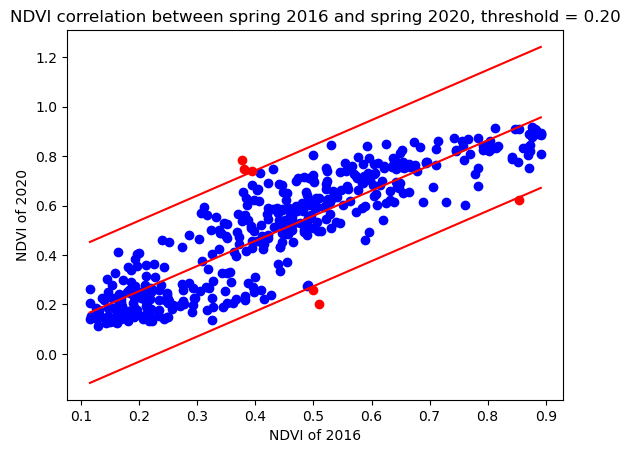

La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = 0.20, vaut : 0.903
Le nombre de pixels supprimés, avec threshold = 0.20, est de : 6


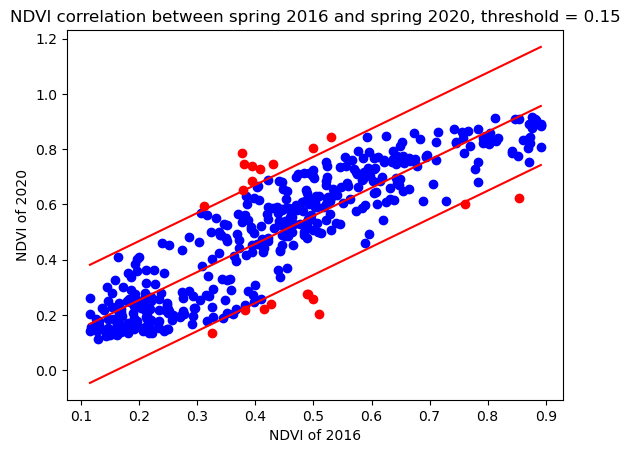

La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = 0.15, vaut : 0.919
Le nombre de pixels supprimés, avec threshold = 0.15, est de : 20


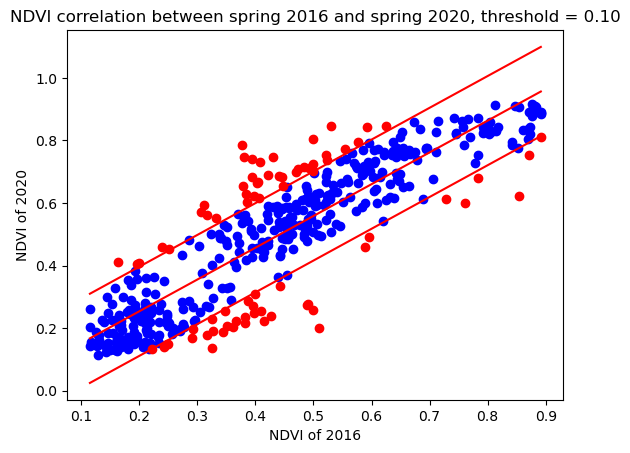

La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = 0.10, vaut : 0.954
Le nombre de pixels supprimés, avec threshold = 0.10, est de : 78


In [287]:
threshold=0.20
Corr_matrixNDVI=np.corrcoef(affichage_ndvi(a0,b0,threshold)[0],affichage_ndvi(a0,b0,threshold)[2])
CorrNDVI=round(Corr_matrixNDVI[0,1],3)
plt.scatter(affichage_ndvi(a0,b0,threshold)[0],affichage_ndvi(a0,b0,threshold)[2],color='b')
plt.scatter(affichage_ndvi(a0,b0,threshold)[1],affichage_ndvi(a0,b0,threshold)[3],color='r')
plt.plot(x_reg_ndvi, y_reg_ndvi, color='r')
plt.plot(affichage_ndvi(a0,b0,threshold)[4], affichage_ndvi(a0,b0,threshold)[5], color='r')
plt.plot(affichage_ndvi(a0,b0,threshold)[6], affichage_ndvi(a0,b0,threshold)[7], color='r')
plt.xlabel('NDVI of 2016')
plt.ylabel('NDVI of 2020')
plt.title('NDVI correlation between spring 2016 and spring 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrNDVI)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_ndvi(a0,b0,threshold)[1]))

threshold=0.15
Corr_matrixNDVI=np.corrcoef(affichage_ndvi(a0,b0,threshold)[0],affichage_ndvi(a0,b0,threshold)[2])
CorrNDVI=round(Corr_matrixNDVI[0,1],3)
plt.scatter(affichage_ndvi(a0,b0,threshold)[0],affichage_ndvi(a0,b0,threshold)[2],color='b')
plt.scatter(affichage_ndvi(a0,b0,threshold)[1],affichage_ndvi(a0,b0,threshold)[3],color='r')
plt.plot(x_reg_ndvi, y_reg_ndvi, color='r')
plt.plot(affichage_ndvi(a0,b0,threshold)[4], affichage_ndvi(a0,b0,threshold)[5], color='r')
plt.plot(affichage_ndvi(a0,b0,threshold)[6], affichage_ndvi(a0,b0,threshold)[7], color='r')
plt.xlabel('NDVI of 2016')
plt.ylabel('NDVI of 2020')
plt.title('NDVI correlation between spring 2016 and spring 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrNDVI)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_ndvi(a0,b0,threshold)[1]))

threshold=0.10
Corr_matrixNDVI=np.corrcoef(affichage_ndvi(a0,b0,threshold)[0],affichage_ndvi(a0,b0,threshold)[2])
CorrNDVI=round(Corr_matrixNDVI[0,1],3)
plt.scatter(affichage_ndvi(a0,b0,threshold)[0],affichage_ndvi(a0,b0,threshold)[2],color='b')
plt.scatter(affichage_ndvi(a0,b0,threshold)[1],affichage_ndvi(a0,b0,threshold)[3],color='r')
plt.plot(x_reg_ndvi, y_reg_ndvi, color='r')
plt.plot(affichage_ndvi(a0,b0,threshold)[4], affichage_ndvi(a0,b0,threshold)[5], color='r')
plt.plot(affichage_ndvi(a0,b0,threshold)[6], affichage_ndvi(a0,b0,threshold)[7], color='r')
plt.xlabel('NDVI of 2016')
plt.ylabel('NDVI of 2020')
plt.title('NDVI correlation between spring 2016 and spring 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrNDVI)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_ndvi(a0,b0,threshold)[1]))


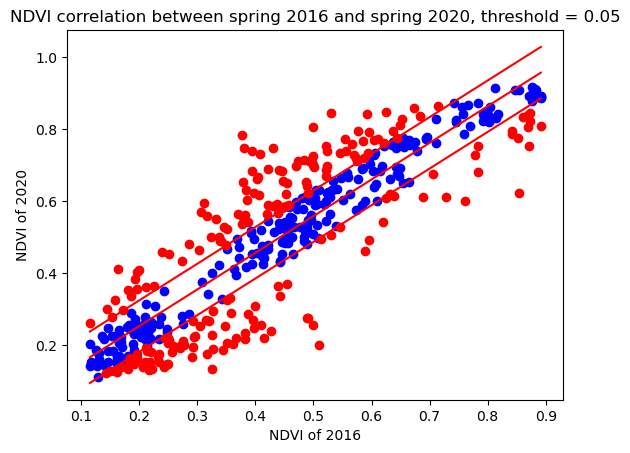

La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = 0.05, vaut : 0.984
Le nombre de pixels supprimés, avec threshold = 0.05, est de : 210


In [288]:
threshold=0.05
Corr_matrixNDVI=np.corrcoef(affichage_ndvi(a0,b0,threshold)[0],affichage_ndvi(a0,b0,threshold)[2])
CorrNDVI=round(Corr_matrixNDVI[0,1],3)
plt.scatter(affichage_ndvi(a0,b0,threshold)[0],affichage_ndvi(a0,b0,threshold)[2],color='b')
plt.scatter(affichage_ndvi(a0,b0,threshold)[1],affichage_ndvi(a0,b0,threshold)[3],color='r')
plt.plot(x_reg_ndvi, y_reg_ndvi, color='r')
plt.plot(affichage_ndvi(a0,b0,threshold)[4], affichage_ndvi(a0,b0,threshold)[5], color='r')
plt.plot(affichage_ndvi(a0,b0,threshold)[6], affichage_ndvi(a0,b0,threshold)[7], color='r')
plt.xlabel('NDVI of 2016')
plt.ylabel('NDVI of 2020')
plt.title('NDVI correlation between spring 2016 and spring 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrNDVI)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_ndvi(a0,b0,threshold)[1]))

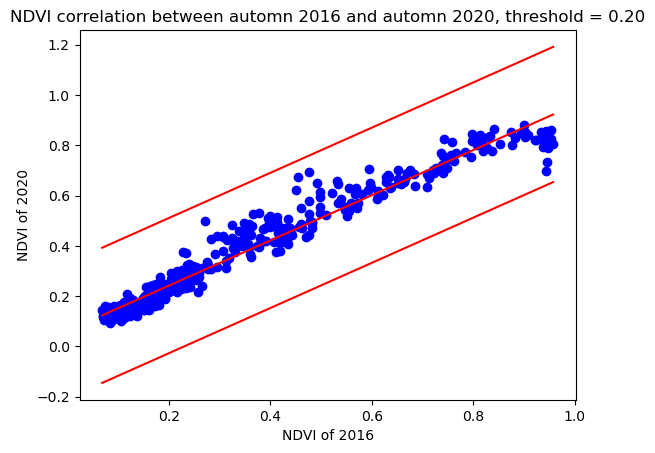

En autonne, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = 0.20, vaut : 0.979
Le nombre de pixels supprimés, avec threshold = 0.20, est de : 0


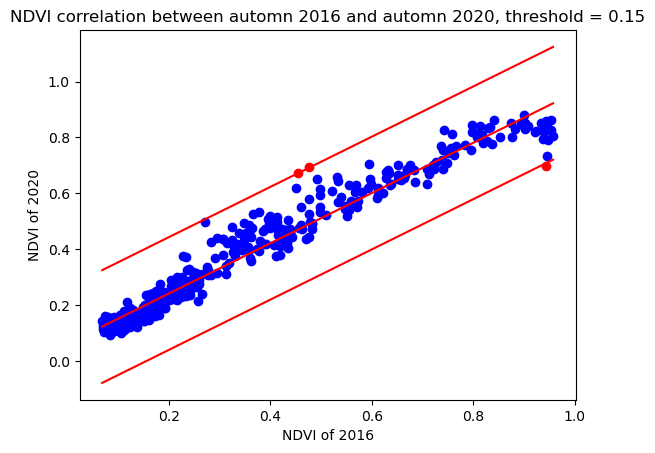

En autonne, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = 0.15, vaut : 0.981
Le nombre de pixels supprimés, avec threshold = 0.15, est de : 3


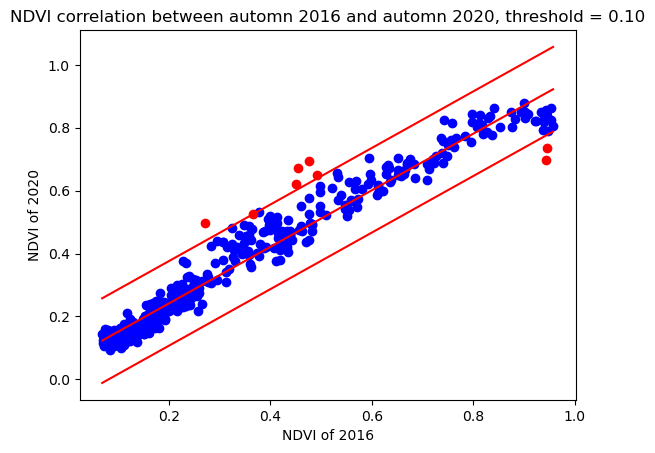

En autonne, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = 0.10, vaut : 0.984
Le nombre de pixels supprimés, avec threshold = 0.10, est de : 8


In [205]:
threshold=0.20
Corr_matrixNDVI_2=np.corrcoef(affichage_ndvi_2(a2,b2,threshold)[0],affichage_ndvi_2(a2,b2,threshold)[2])
CorrNDVI_2=round(Corr_matrixNDVI_2[0,1],3)
plt.scatter(affichage_ndvi_2(a2,b2,threshold)[0],affichage_ndvi_2(a2,b2,threshold)[2],color='b')
plt.scatter(affichage_ndvi_2(a2,b2,threshold)[1],affichage_ndvi_2(a2,b2,threshold)[3],color='r')
plt.plot(x_reg_ndvi_2, y_reg_ndvi_2, color='r')
plt.plot(affichage_ndvi_2(a2,b2,threshold)[4], affichage_ndvi_2(a2,b2,threshold)[5], color='r')
plt.plot(affichage_ndvi_2(a2,b2,threshold)[6], affichage_ndvi_2(a2,b2,threshold)[7], color='r')
plt.xlabel('NDVI of 2016')
plt.ylabel('NDVI of 2020')
plt.title('NDVI correlation between automn 2016 and automn 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("En autonne, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrNDVI_2)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_ndvi_2(a2,b2,threshold)[1]))

threshold=0.15
Corr_matrixNDVI_2=np.corrcoef(affichage_ndvi_2(a2,b2,threshold)[0],affichage_ndvi_2(a2,b2,threshold)[2])
CorrNDVI_2=round(Corr_matrixNDVI_2[0,1],3)
plt.scatter(affichage_ndvi_2(a2,b2,threshold)[0],affichage_ndvi_2(a2,b2,threshold)[2],color='b')
plt.scatter(affichage_ndvi_2(a2,b2,threshold)[1],affichage_ndvi_2(a2,b2,threshold)[3],color='r')
plt.plot(x_reg_ndvi_2, y_reg_ndvi_2, color='r')
plt.plot(affichage_ndvi_2(a2,b2,threshold)[4], affichage_ndvi_2(a2,b2,threshold)[5], color='r')
plt.plot(affichage_ndvi_2(a2,b2,threshold)[6], affichage_ndvi_2(a2,b2,threshold)[7], color='r')
plt.xlabel('NDVI of 2016')
plt.ylabel('NDVI of 2020')
plt.title('NDVI correlation between automn 2016 and automn 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("En autonne, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrNDVI_2)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_ndvi_2(a2,b2,threshold)[1]))

threshold=0.10
Corr_matrixNDVI_2=np.corrcoef(affichage_ndvi_2(a2,b2,threshold)[0],affichage_ndvi_2(a2,b2,threshold)[2])
CorrNDVI_2=round(Corr_matrixNDVI_2[0,1],3)
plt.scatter(affichage_ndvi_2(a2,b2,threshold)[0],affichage_ndvi_2(a2,b2,threshold)[2],color='b')
plt.scatter(affichage_ndvi_2(a2,b2,threshold)[1],affichage_ndvi_2(a2,b2,threshold)[3],color='r')
plt.plot(x_reg_ndvi_2, y_reg_ndvi_2, color='r')
plt.plot(affichage_ndvi_2(a2,b2,threshold)[4], affichage_ndvi_2(a2,b2,threshold)[5], color='r')
plt.plot(affichage_ndvi_2(a2,b2,threshold)[6], affichage_ndvi_2(a2,b2,threshold)[7], color='r')
plt.xlabel('NDVI of 2016')
plt.ylabel('NDVI of 2020')
plt.title('NDVI correlation between automn 2016 and automn 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("En autonne, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrNDVI_2)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_ndvi_2(a2,b2,threshold)[1]))

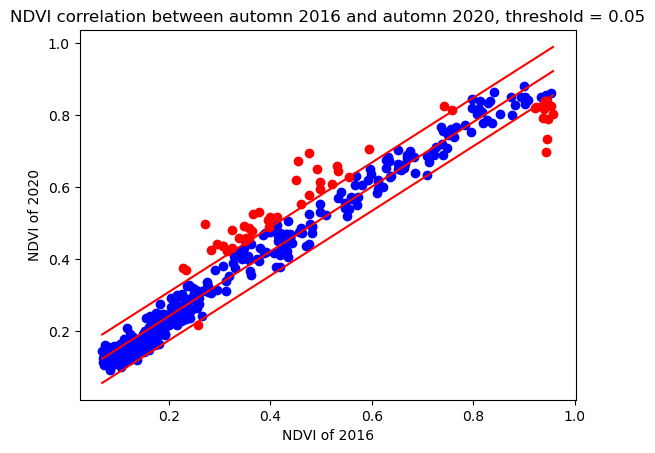

En autonne, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = 0.05, vaut : 0.992
Le nombre de pixels supprimés, avec threshold = 0.05, est de : 54


In [206]:
threshold=0.05
Corr_matrixNDVI_2=np.corrcoef(affichage_ndvi_2(a2,b2,threshold)[0],affichage_ndvi_2(a2,b2,threshold)[2])
CorrNDVI_2=round(Corr_matrixNDVI_2[0,1],3)
plt.scatter(affichage_ndvi_2(a2,b2,threshold)[0],affichage_ndvi_2(a2,b2,threshold)[2],color='b')
plt.scatter(affichage_ndvi_2(a2,b2,threshold)[1],affichage_ndvi_2(a2,b2,threshold)[3],color='r')
plt.plot(x_reg_ndvi_2, y_reg_ndvi_2, color='r')
plt.plot(affichage_ndvi_2(a2,b2,threshold)[4], affichage_ndvi_2(a2,b2,threshold)[5], color='r')
plt.plot(affichage_ndvi_2(a2,b2,threshold)[6], affichage_ndvi_2(a2,b2,threshold)[7], color='r')
plt.xlabel('NDVI of 2016')
plt.ylabel('NDVI of 2020')
plt.title('NDVI correlation between automn 2016 and automn 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("En autonne, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrNDVI_2)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_ndvi_2(a2,b2,threshold)[1]))

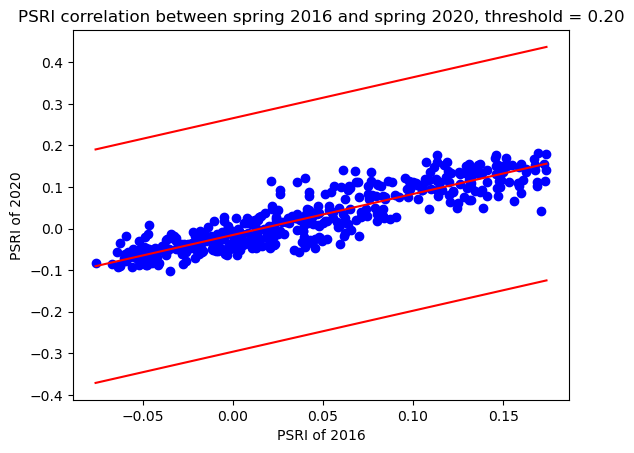

La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = 0.20, vaut : 0.9
Le nombre de pixels supprimés, avec threshold = 0.20, est de : 0


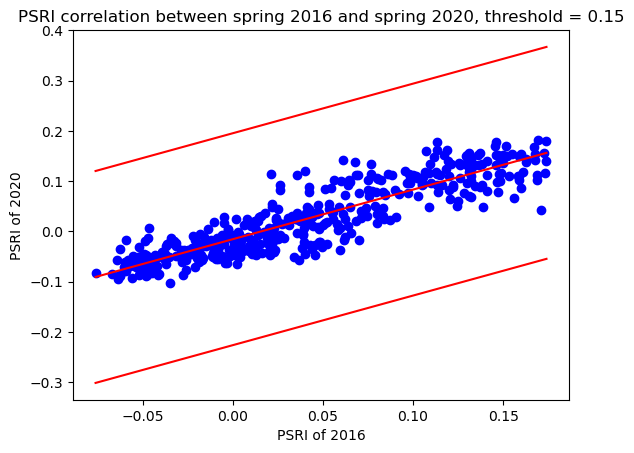

La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = 0.15, vaut : 0.9
Le nombre de pixels supprimés, avec threshold = 0.15, est de : 0


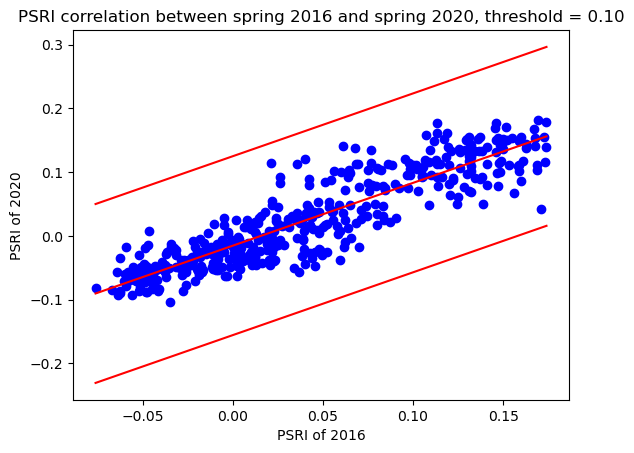

La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = 0.10, vaut : 0.9
Le nombre de pixels supprimés, avec threshold = 0.10, est de : 0


In [207]:
threshold=0.20
Corr_matrixPSRI=np.corrcoef(affichage_psri(a1,b1,threshold)[0],affichage_psri(a1,b1,threshold)[2])
CorrPSRI=round(Corr_matrixPSRI[0,1],3)
plt.scatter(affichage_psri(a1,b1,threshold)[0],affichage_psri(a1,b1,threshold)[2],color='b')
plt.scatter(affichage_psri(a1,b1,threshold)[1],affichage_psri(a1,b1,threshold)[3],color='r')
plt.plot(x_reg_PSRI, y_reg_PSRI, color='r')
plt.plot(affichage_psri(a1,b1,threshold)[4], affichage_psri(a1,b1,threshold)[5], color='r')
plt.plot(affichage_psri(a1,b1,threshold)[6], affichage_psri(a1,b1,threshold)[7], color='r')
plt.xlabel('PSRI of 2016')
plt.ylabel('PSRI of 2020')
plt.title('PSRI correlation between spring 2016 and spring 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrPSRI)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_psri(a1,b1,threshold)[1]))

threshold=0.15
Corr_matrixPSRI=np.corrcoef(affichage_psri(a1,b1,threshold)[0],affichage_psri(a1,b1,threshold)[2])
CorrPSRI=round(Corr_matrixPSRI[0,1],3)
plt.scatter(affichage_psri(a1,b1,threshold)[0],affichage_psri(a1,b1,threshold)[2],color='b')
plt.scatter(affichage_psri(a1,b1,threshold)[1],affichage_psri(a1,b1,threshold)[3],color='r')
plt.plot(x_reg_PSRI, y_reg_PSRI, color='r')
plt.plot(affichage_psri(a1,b1,threshold)[4], affichage_psri(a1,b1,threshold)[5], color='r')
plt.plot(affichage_psri(a1,b1,threshold)[6], affichage_psri(a1,b1,threshold)[7], color='r')
plt.xlabel('PSRI of 2016')
plt.ylabel('PSRI of 2020')
plt.title('PSRI correlation between spring 2016 and spring 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrPSRI)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_psri(a1,b1,threshold)[1]))

threshold=0.10
Corr_matrixPSRI=np.corrcoef(affichage_psri(a1,b1,threshold)[0],affichage_psri(a1,b1,threshold)[2])
CorrPSRI=round(Corr_matrixPSRI[0,1],3)
plt.scatter(affichage_psri(a1,b1,threshold)[0],affichage_psri(a1,b1,threshold)[2],color='b')
plt.scatter(affichage_psri(a1,b1,threshold)[1],affichage_psri(a1,b1,threshold)[3],color='r')
plt.plot(x_reg_PSRI, y_reg_PSRI, color='r')
plt.plot(affichage_psri(a1,b1,threshold)[4], affichage_psri(a1,b1,threshold)[5], color='r')
plt.plot(affichage_psri(a1,b1,threshold)[6], affichage_psri(a1,b1,threshold)[7], color='r')
plt.xlabel('PSRI of 2016')
plt.ylabel('PSRI of 2020')
plt.title('PSRI correlation between spring 2016 and spring 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrPSRI)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_psri(a1,b1,threshold)[1]))


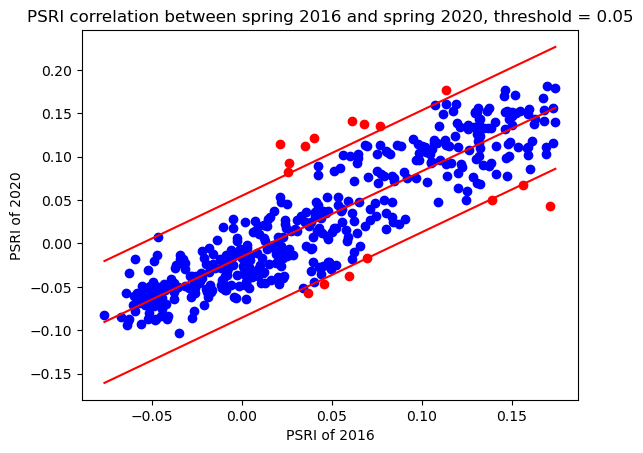

La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = 0.05, vaut : 0.923
Le nombre de pixels supprimés, avec threshold = 0.05, est de : 16


In [208]:
threshold=0.05
Corr_matrixPSRI=np.corrcoef(affichage_psri(a1,b1,threshold)[0],affichage_psri(a1,b1,threshold)[2])
CorrPSRI=round(Corr_matrixPSRI[0,1],3)
plt.scatter(affichage_psri(a1,b1,threshold)[0],affichage_psri(a1,b1,threshold)[2],color='b')
plt.scatter(affichage_psri(a1,b1,threshold)[1],affichage_psri(a1,b1,threshold)[3],color='r')
plt.plot(x_reg_PSRI, y_reg_PSRI, color='r')
plt.plot(affichage_psri(a1,b1,threshold)[4], affichage_psri(a1,b1,threshold)[5], color='r')
plt.plot(affichage_psri(a1,b1,threshold)[6], affichage_psri(a1,b1,threshold)[7], color='r')
plt.xlabel('PSRI of 2016')
plt.ylabel('PSRI of 2020')
plt.title('PSRI correlation between spring 2016 and spring 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrPSRI)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_psri(a1,b1,threshold)[1]))

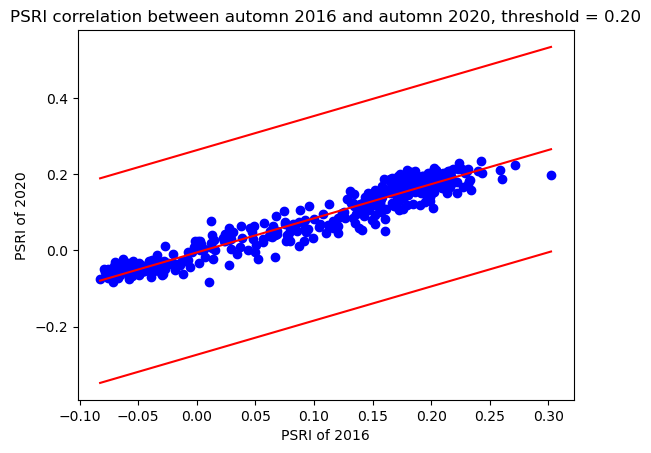

La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = 0.20, vaut : 0.964
Le nombre de pixels supprimés, avec threshold = 0.20, est de : 0


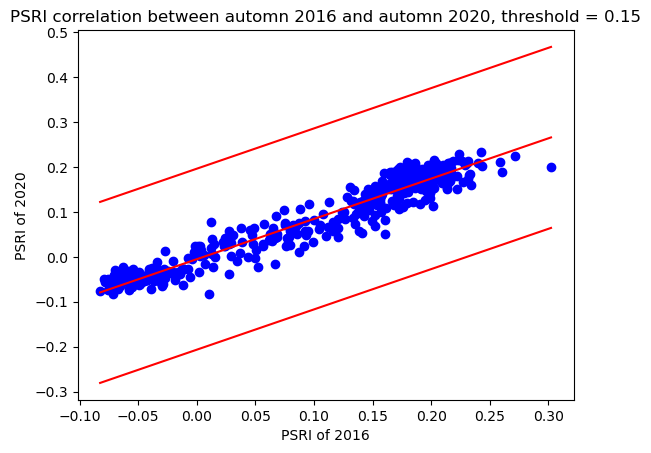

La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = 0.15, vaut : 0.964
Le nombre de pixels supprimés, avec threshold = 0.15, est de : 0


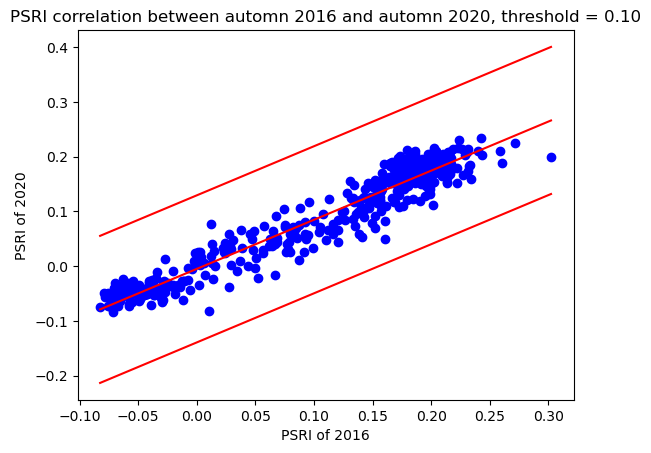

La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = 0.10, vaut : 0.964
Le nombre de pixels supprimés, avec threshold = 0.10, est de : 0


In [209]:
threshold=0.20
Corr_matrixPSRI_2=np.corrcoef(affichage_psri_2(a3,b3,threshold)[0],affichage_psri_2(a3,b3,threshold)[2])
CorrPSRI_2=round(Corr_matrixPSRI_2[0,1],3)
plt.scatter(affichage_psri_2(a3,b3,threshold)[0],affichage_psri_2(a3,b3,threshold)[2],color='b')
plt.scatter(affichage_psri_2(a3,b3,threshold)[1],affichage_psri_2(a3,b3,threshold)[3],color='r')
plt.plot(x_reg_PSRI_2, y_reg_PSRI_2, color='r')
plt.plot(affichage_psri_2(a3,b3,threshold)[4], affichage_psri_2(a3,b3,threshold)[5], color='r')
plt.plot(affichage_psri_2(a3,b3,threshold)[6], affichage_psri_2(a3,b3,threshold)[7], color='r')
plt.xlabel('PSRI of 2016')
plt.ylabel('PSRI of 2020')
plt.title('PSRI correlation between automn 2016 and automn 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrPSRI_2)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_psri_2(a3,b3,threshold)[1]))

threshold=0.15
Corr_matrixPSRI_2=np.corrcoef(affichage_psri_2(a3,b3,threshold)[0],affichage_psri_2(a3,b3,threshold)[2])
CorrPSRI_2=round(Corr_matrixPSRI_2[0,1],3)
plt.scatter(affichage_psri_2(a3,b3,threshold)[0],affichage_psri_2(a3,b3,threshold)[2],color='b')
plt.scatter(affichage_psri_2(a3,b3,threshold)[1],affichage_psri_2(a3,b3,threshold)[3],color='r')
plt.plot(x_reg_PSRI_2, y_reg_PSRI_2, color='r')
plt.plot(affichage_psri_2(a3,b3,threshold)[4], affichage_psri_2(a3,b3,threshold)[5], color='r')
plt.plot(affichage_psri_2(a3,b3,threshold)[6], affichage_psri_2(a3,b3,threshold)[7], color='r')
plt.xlabel('PSRI of 2016')
plt.ylabel('PSRI of 2020')
plt.title('PSRI correlation between automn 2016 and automn 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrPSRI_2)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_psri_2(a3,b3,threshold)[1]))

threshold=0.10
Corr_matrixPSRI_2=np.corrcoef(affichage_psri_2(a3,b3,threshold)[0],affichage_psri_2(a3,b3,threshold)[2])
CorrPSRI_2=round(Corr_matrixPSRI_2[0,1],3)
plt.scatter(affichage_psri_2(a3,b3,threshold)[0],affichage_psri_2(a3,b3,threshold)[2],color='b')
plt.scatter(affichage_psri_2(a3,b3,threshold)[1],affichage_psri_2(a3,b3,threshold)[3],color='r')
plt.plot(x_reg_PSRI_2, y_reg_PSRI_2, color='r')
plt.plot(affichage_psri_2(a3,b3,threshold)[4], affichage_psri_2(a3,b3,threshold)[5], color='r')
plt.plot(affichage_psri_2(a3,b3,threshold)[6], affichage_psri_2(a3,b3,threshold)[7], color='r')
plt.xlabel('PSRI of 2016')
plt.ylabel('PSRI of 2020')
plt.title('PSRI correlation between automn 2016 and automn 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrPSRI_2)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_psri_2(a3,b3,threshold)[1]))

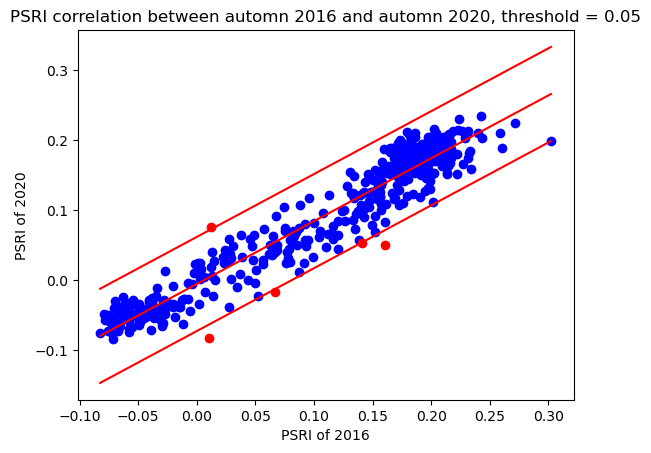

La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = 0.05, vaut : 0.967
Le nombre de pixels supprimés, avec threshold = 0.05, est de : 5


In [210]:
threshold=0.05
Corr_matrixPSRI_2=np.corrcoef(affichage_psri_2(a3,b3,threshold)[0],affichage_psri_2(a3,b3,threshold)[2])
CorrPSRI_2=round(Corr_matrixPSRI_2[0,1],3)
plt.scatter(affichage_psri_2(a3,b3,threshold)[0],affichage_psri_2(a3,b3,threshold)[2],color='b')
plt.scatter(affichage_psri_2(a3,b3,threshold)[1],affichage_psri_2(a3,b3,threshold)[3],color='r')
plt.plot(x_reg_PSRI_2, y_reg_PSRI_2, color='r')
plt.plot(affichage_psri_2(a3,b3,threshold)[4], affichage_psri_2(a3,b3,threshold)[5], color='r')
plt.plot(affichage_psri_2(a3,b3,threshold)[6], affichage_psri_2(a3,b3,threshold)[7], color='r')
plt.xlabel('PSRI of 2016')
plt.ylabel('PSRI of 2020')
plt.title('PSRI correlation between automn 2016 and automn 2020, threshold = {:.2f}'.format(threshold))
plt.show()
print("La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020, après application d'un threshold = {:.2f}, vaut :".format(threshold),CorrPSRI_2)
print("Le nombre de pixels supprimés, avec threshold = {:.2f}, est de :".format(threshold),len(affichage_psri_2(a3,b3,threshold)[1]))

In [211]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi16_2=np.copy(coord)
ndvi20_2=np.copy(coord)
ndvi16_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi16_2]
ndvi20_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi20_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        ndvi16_2_float[i][0][j]=ndvi16_2_float[i][1][j]=((bande_infrarouge16[i][j] - bande_rouge16[i][j]) / (bande_infrarouge16[i][j] + bande_rouge16[i][j]))
        ndvi20_2_float[i][0][j]=ndvi20_2_float[i][1][j]=((bande_infrarouge[i][j] - bande_rouge[i][j]) / (bande_infrarouge[i][j] + bande_rouge[i][j]))

distances_ndvi_2_float=np.copy(ndvi16_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.20
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a,b,ndvi16_2_float[i][0][j],ndvi20_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


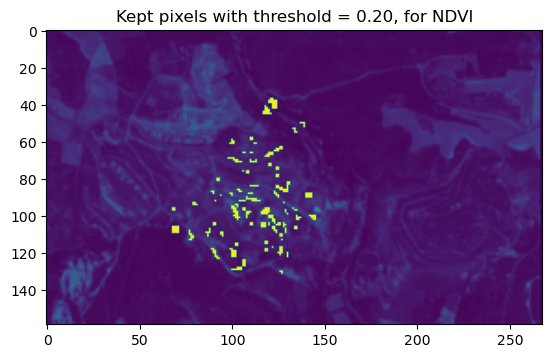

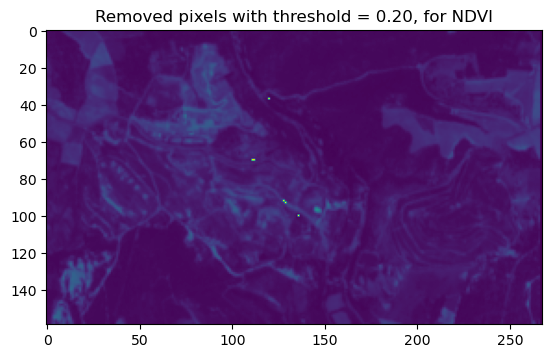

Le nombre de pixels supprimés, avec threshold = 0.20, est de : 6
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [212]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.20, for NDVI")
        plt.show()

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.20, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.20, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [213]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi16_2=np.copy(coord)
ndvi20_2=np.copy(coord)
ndvi16_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi16_2]
ndvi20_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi20_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        ndvi16_2_float[i][0][j]=ndvi16_2_float[i][1][j]=((bande_infrarouge16[i][j] - bande_rouge16[i][j]) / (bande_infrarouge16[i][j] + bande_rouge16[i][j]))
        ndvi20_2_float[i][0][j]=ndvi20_2_float[i][1][j]=((bande_infrarouge[i][j] - bande_rouge[i][j]) / (bande_infrarouge[i][j] + bande_rouge[i][j]))

distances_ndvi_2_float=np.copy(ndvi16_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.15
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a,b,ndvi16_2_float[i][0][j],ndvi20_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


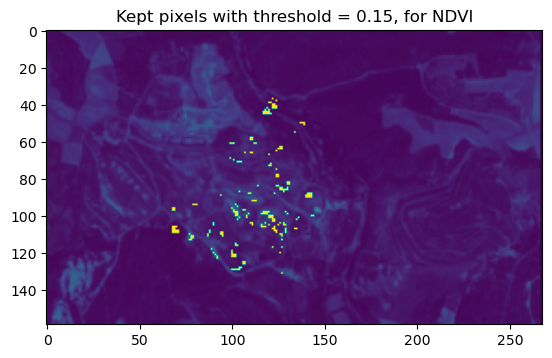

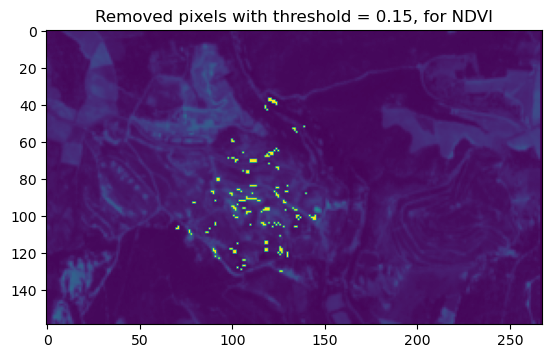

Le nombre de pixels supprimés, avec threshold = 0.15, est de : 210
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [241]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.15, for NDVI")
        plt.show()

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.15, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.15, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [242]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi16_2=np.copy(coord)
ndvi20_2=np.copy(coord)
ndvi16_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi16_2]
ndvi20_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi20_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        ndvi16_2_float[i][0][j]=ndvi16_2_float[i][1][j]=((bande_infrarouge16[i][j] - bande_rouge16[i][j]) / (bande_infrarouge16[i][j] + bande_rouge16[i][j]))
        ndvi20_2_float[i][0][j]=ndvi20_2_float[i][1][j]=((bande_infrarouge[i][j] - bande_rouge[i][j]) / (bande_infrarouge[i][j] + bande_rouge[i][j]))

distances_ndvi_2_float=np.copy(ndvi16_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.10
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a,b,ndvi16_2_float[i][0][j],ndvi20_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


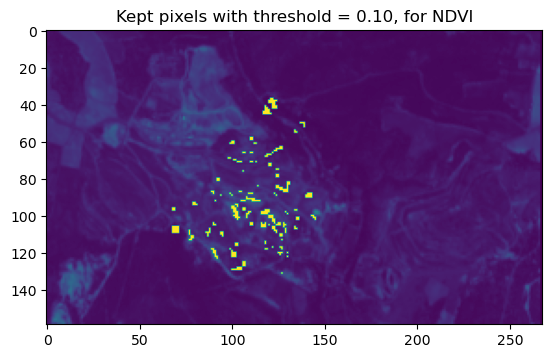

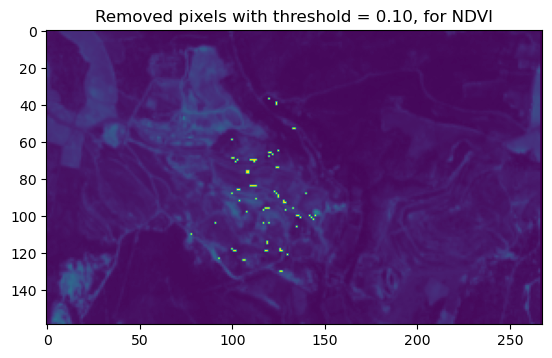

Le nombre de pixels supprimés, avec threshold = 0.10, est de : 78
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [243]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.10, for NDVI")
        plt.show()

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
                
    profile = src.profile
    profile.update(count =1)
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('NDVI_10.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI_10.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.10, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.10, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [244]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi16_2=np.copy(coord)
ndvi20_2=np.copy(coord)
ndvi16_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi16_2]
ndvi20_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi20_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        ndvi16_2_float[i][0][j]=ndvi16_2_float[i][1][j]=((bande_infrarouge16[i][j] - bande_rouge16[i][j]) / (bande_infrarouge16[i][j] + bande_rouge16[i][j]))
        ndvi20_2_float[i][0][j]=ndvi20_2_float[i][1][j]=((bande_infrarouge[i][j] - bande_rouge[i][j]) / (bande_infrarouge[i][j] + bande_rouge[i][j]))

distances_ndvi_2_float=np.copy(ndvi16_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a,b,ndvi16_2_float[i][0][j],ndvi20_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


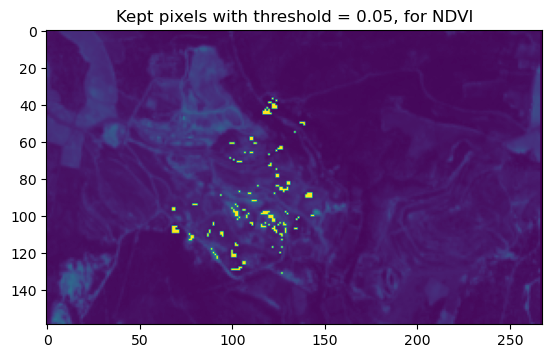

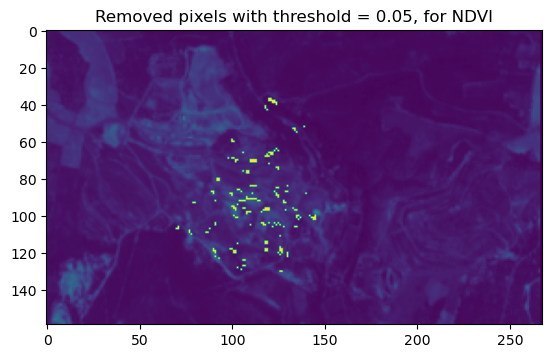

Le nombre de pixels supprimés, avec threshold = 0.05, est de : 210
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [245]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for NDVI")
        plt.show()

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
                
    profile = src.profile
    profile.update(count =1)
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('NDVI_05.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI_05.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for NDVI")
        plt.show()
    print("Le nombre de pixels supprimés, avec threshold = 0.05, est de :",compteur) 
    print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [246]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

psri16_2=np.copy(coord)
psri20_2=np.copy(coord)
psri16_2_float = [[arr.astype(float) for arr in sublst] for sublst in psri16_2]
psri20_2_float = [[arr.astype(float) for arr in sublst] for sublst in psri20_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        psri16_2_float[i][0][j]=psri16_2_float[i][1][j]=(bande_rouge16[i][j]-bande_verte16[i][j])/bande_infrarouge16[i][j]
        psri20_2_float[i][0][j]=psri20_2_float[i][1][j]=(bande_rouge[i][j]-bande_verte[i][j])/bande_infrarouge[i][j]

distances_psri_2_float=np.copy(psri16_2_float)
coord_2_kept_psri=np.copy(coord)
coord_2_removed_psri=np.copy(coord)
coord_2_kept_float_psri = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept_psri]
coord_2_removed_float_psri = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed_psri]

threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_psri_2_float[i][0][j]=distances_psri_2_float[i][1][j]=(distance_point_droite(a1,b1,psri16_2_float[i][0][j],psri20_2_float[i][0][j]))
        if distances_psri_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_psri[i][0][j]=coord_2_kept_float_psri[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_psri[i][0][j]=coord_2_removed_float_psri[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


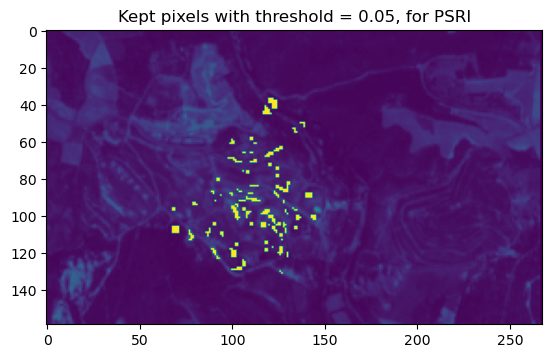

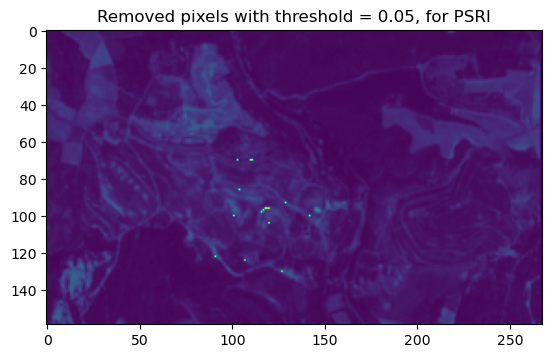

Le nombre de pixels supprimés, avec threshold = 0.05, est de : 16
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [247]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if(coord_2_kept_float_psri[i][0][j]!=0):
                data[2,int(coord_2_kept_float_psri[i][0][j]),int(coord_2_kept_float_psri[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for PSRI")
        plt.show()

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if(coord_2_removed_float_psri[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float_psri[i][0][j]),int(coord_2_removed_float_psri[i][1][j])]=1 
                
    profile = src.profile
    profile.update(count =1)
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('PSRI_05.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('PSRI_05.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for PSRI")
        plt.show()
    print("Le nombre de pixels supprimés, avec threshold = 0.05, est de :",compteur) 
    print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [248]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

psri16_2=np.copy(coord)
psri20_2=np.copy(coord)
psri16_2_float = [[arr.astype(float) for arr in sublst] for sublst in psri16_2]
psri20_2_float = [[arr.astype(float) for arr in sublst] for sublst in psri20_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        psri16_2_float[i][0][j]=psri16_2_float[i][1][j]=(bande_rouge16[i][j]-bande_verte16[i][j])/bande_infrarouge16[i][j]
        psri20_2_float[i][0][j]=psri20_2_float[i][1][j]=(bande_rouge[i][j]-bande_verte[i][j])/bande_infrarouge[i][j]

distances_psri_2_float=np.copy(psri16_2_float)
coord_2_kept_psri=np.copy(coord)
coord_2_removed_psri=np.copy(coord)
coord_2_kept_float_psri = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept_psri]
coord_2_removed_float_psri = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed_psri]

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [249]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi16_2=np.copy(coord)
ndvi20_2=np.copy(coord)
ndvi16_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi16_2]
ndvi20_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi20_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        ndvi16_2_float[i][0][j]=ndvi16_2_float[i][1][j]=((bande_infrarouge16[i][j] - bande_rouge16[i][j]) / (bande_infrarouge16[i][j] + bande_rouge16[i][j]))
        ndvi20_2_float[i][0][j]=ndvi20_2_float[i][1][j]=((bande_infrarouge[i][j] - bande_rouge[i][j]) / (bande_infrarouge[i][j] + bande_rouge[i][j]))

distances_ndvi_2_float=np.copy(ndvi16_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [250]:
threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a,b,ndvi16_2_float[i][0][j],ndvi20_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_psri_2_float[i][0][j]=distances_psri_2_float[i][1][j]=(distance_point_droite(a1,b1,psri16_2_float[i][0][j],psri20_2_float[i][0][j]))
        if distances_psri_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_psri[i][0][j]=coord_2_kept_float_psri[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_psri[i][0][j]=coord_2_removed_float_psri[i][1][j]=0.0

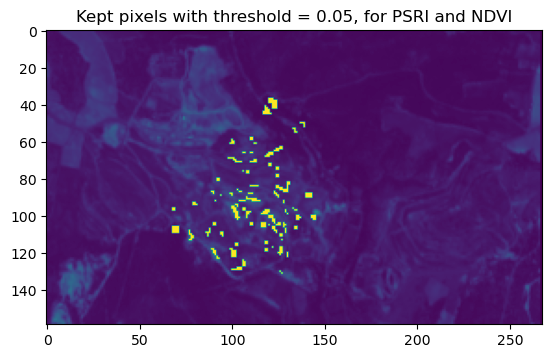

Le nombre de pixels gardés par combinaison des indices, avec threshold = 0.05, est de : 430


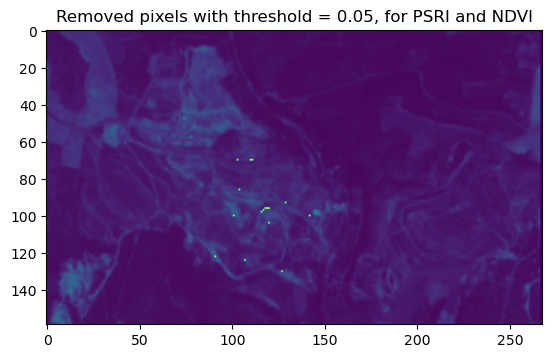

Le nombre de pixels supprimés par combinaison des indices, avec threshold = 0.05, est de : 16


In [251]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    k=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if not((coord_2_kept_float_psri[i][0][j]==0.0)&(coord_2_kept_float[i][0][j]==0.0)):
                k+=1
                data[2,int(coord_2_kept_float_psri[i][0][j]),int(coord_2_kept_float_psri[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for PSRI and NDVI")
        plt.show()
    print("Le nombre de pixels gardés par combinaison des indices, avec threshold = 0.05, est de :",k) 

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    k=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if (coord_2_kept_float_psri[i][0][j]==0.0)&(coord_2_kept_float[i][0][j]==0.0):
                k+=1   
                data[2,int(coord_2_removed_float_psri[i][0][j]),int(coord_2_removed_float_psri[i][1][j])]=1 
                
    profile = src.profile
    profile.update(count =1)
 
    # On écrit les nouvelles données dans un nouveau fichier raster
    
    with rasterio.open('Superposition_NDVI_PSRI_05.tif', 'w', **src.profile) as dst:
        dst.write(data)
        
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('Superposition_NDVI_PSRI_05.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for PSRI and NDVI")
        plt.show()
    print("Le nombre de pixels supprimés par combinaison des indices, avec threshold = 0.05, est de :",k) 

In [252]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

psri16_2=np.copy(coord)
psri20_2=np.copy(coord)
psri16_2_float = [[arr.astype(float) for arr in sublst] for sublst in psri16_2]
psri20_2_float = [[arr.astype(float) for arr in sublst] for sublst in psri20_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        psri16_2_float[i][0][j]=psri16_2_float[i][1][j]=(bande_rouge16[i][j]-bande_verte16[i][j])/bande_infrarouge16[i][j]
        psri20_2_float[i][0][j]=psri20_2_float[i][1][j]=(bande_rouge[i][j]-bande_verte[i][j])/bande_infrarouge[i][j]

distances_psri_2_float=np.copy(psri16_2_float)
coord_2_kept_psri=np.copy(coord)
coord_2_removed_psri=np.copy(coord)
coord_2_kept_float_psri = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept_psri]
coord_2_removed_float_psri = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed_psri]

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [253]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

psri16_3=np.copy(coord)
psri20_3=np.copy(coord)
psri16_3_float = [[arr.astype(float) for arr in sublst] for sublst in psri16_3]
psri20_3_float = [[arr.astype(float) for arr in sublst] for sublst in psri20_3]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        psri16_3_float[i][0][j]=psri16_3_float[i][1][j]=(bande_rouge16_2[i][j]-bande_verte16_2[i][j])/bande_infrarouge16_2[i][j]
        psri20_3_float[i][0][j]=psri20_3_float[i][1][j]=(bande_rouge_2[i][j]-bande_verte_2[i][j])/bande_infrarouge_2[i][j]

distances_psri_3_float=np.copy(psri16_3_float)
coord_3_kept_psri=np.copy(coord)
coord_3_removed_psri=np.copy(coord)
coord_3_kept_float_psri = [[arr.astype(float) for arr in sublst] for sublst in coord_3_kept_psri]
coord_3_removed_float_psri = [[arr.astype(float) for arr in sublst] for sublst in coord_3_removed_psri]

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [254]:
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_psri_3_float[i][0][j]=distances_psri_3_float[i][1][j]=(distance_point_droite(a3,b3,psri16_3_float[i][0][j],psri20_3_float[i][0][j]))
        if distances_psri_3_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_3_kept_float_psri[i][0][j]=coord_3_kept_float_psri[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_3_removed_float_psri[i][0][j]=coord_3_removed_float_psri[i][1][j]=0.0

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_psri_2_float[i][0][j]=distances_psri_2_float[i][1][j]=(distance_point_droite(a1,b1,psri16_2_float[i][0][j],psri20_2_float[i][0][j]))
        if distances_psri_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_psri[i][0][j]=coord_2_kept_float_psri[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_psri[i][0][j]=coord_2_removed_float_psri[i][1][j]=0.0

In [255]:
k=0
for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if ((coord_2_kept_float_psri[i][0][j]==0.0)and(coord_3_kept_float_psri[i][0][j]==0.0)):
                k+=1
print(k)

0


In [256]:
k=0
for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if ((coord_2_kept_float[i][0][j]==0.0)and(coord_3_kept_float[i][0][j]==0.0)):
                k+=1
print(k)

31


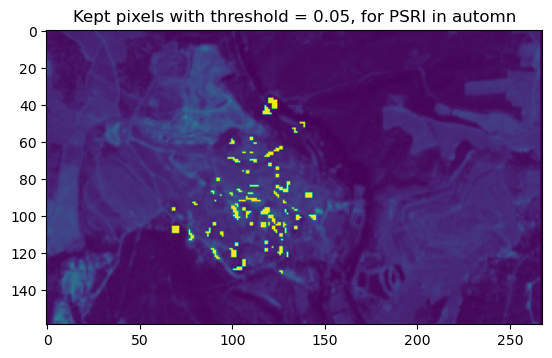

Le nombre de pixels gardés par combinaison des indices, avec threshold = 0.05, est de : 441


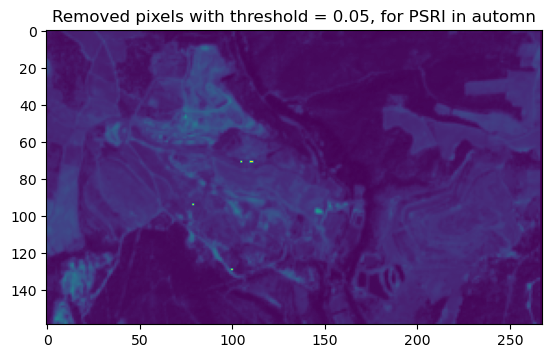

Le nombre de pixels supprimés, avec threshold = 0.05, est de : 5


In [257]:
with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    k=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if not((coord_3_kept_float_psri[i][0][j]==0.0)):
                k+=1
                data[2,int(coord_3_kept_float_psri[i][0][j]),int(coord_3_kept_float_psri[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for PSRI in automn")
        plt.show()
    print("Le nombre de pixels gardés par combinaison des indices, avec threshold = 0.05, est de :",k) 

with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    k=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if (coord_3_kept_float_psri[i][0][j]==0.0):
                k+=1   
                data[2,int(coord_3_removed_float_psri[i][0][j]),int(coord_3_removed_float_psri[i][1][j])]=1 
                
    profile = src.profile
    profile.update(count =1)
 
    # On écrit les nouvelles données dans un nouveau fichier raster
    
    with rasterio.open('PSRI_05_automn.tif', 'w', **src.profile) as dst:
        dst.write(data)
        
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('PSRI_05_automn.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for PSRI in automn")
        plt.show()
    print("Le nombre de pixels supprimés, avec threshold = 0.05, est de :",k) 

In [258]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi16_3=np.copy(coord)
ndvi20_3=np.copy(coord)
ndvi16_3_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi16_3]
ndvi20_3_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi20_3]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        ndvi16_3_float[i][0][j]=ndvi16_3_float[i][1][j]=((bande_infrarouge16_2[i][j] - bande_rouge16_2[i][j]) / (bande_infrarouge16_2[i][j] + bande_rouge16_2[i][j]))
        ndvi20_3_float[i][0][j]=ndvi20_3_float[i][1][j]=((bande_infrarouge_2[i][j] - bande_rouge_2[i][j]) / (bande_infrarouge_2[i][j] + bande_rouge_2[i][j]))

distances_ndvi_3_float=np.copy(ndvi16_3_float)
coord_3_kept=np.copy(coord)
coord_3_removed=np.copy(coord)
coord_3_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_3_kept]
coord_3_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_3_removed]

threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_ndvi_3_float[i][0][j]=distances_ndvi_3_float[i][1][j]=(distance_point_droite(a2,b2,ndvi16_3_float[i][0][j],ndvi20_3_float[i][0][j]))
        if distances_ndvi_3_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_3_kept_float[i][0][j]=coord_3_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_3_removed_float[i][0][j]=coord_3_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


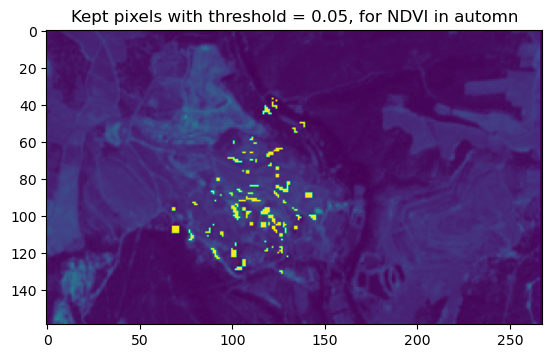

Le nombre de pixels gardés par combinaison des indices, avec threshold = 0.05, est de : 392


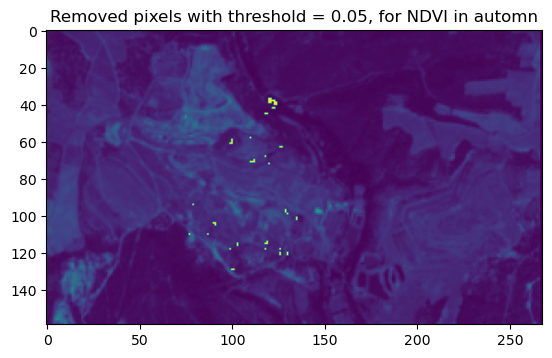

Le nombre de pixels supprimés, avec threshold = 0.05, est de : 54


In [259]:
with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    k=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if not((coord_3_kept_float[i][0][j]==0.0)):
                k+=1
                data[2,int(coord_3_kept_float[i][0][j]),int(coord_3_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for NDVI in automn")
        plt.show()
    print("Le nombre de pixels gardés par combinaison des indices, avec threshold = 0.05, est de :",k) 

with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    k=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if (coord_3_kept_float[i][0][j]==0.0)&(coord_3_kept_float[i][0][j]==0.0):
                k+=1   
                data[2,int(coord_3_removed_float[i][0][j]),int(coord_3_removed_float[i][1][j])]=1 
                
    profile = src.profile
    profile.update(count =1)
 
    # On écrit les nouvelles données dans un nouveau fichier raster
    
    with rasterio.open('NDVI_05_automn.tif', 'w', **src.profile) as dst:
        dst.write(data)
        
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI_05_automn.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for NDVI in automn")
        plt.show()
    print("Le nombre de pixels supprimés, avec threshold = 0.05, est de :",k) 

In [260]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

psri16_2=np.copy(coord)
psri20_2=np.copy(coord)
psri16_2_float = [[arr.astype(float) for arr in sublst] for sublst in psri16_2]
psri20_2_float = [[arr.astype(float) for arr in sublst] for sublst in psri20_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        psri16_2_float[i][0][j]=psri16_2_float[i][1][j]=(bande_rouge16[i][j]-bande_verte16[i][j])/bande_infrarouge16[i][j]
        psri20_2_float[i][0][j]=psri20_2_float[i][1][j]=(bande_rouge[i][j]-bande_verte[i][j])/bande_infrarouge[i][j]

distances_psri_2_float=np.copy(psri16_2_float)
coord_2_kept_psri=np.copy(coord)
coord_2_removed_psri=np.copy(coord)
coord_2_kept_float_psri = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept_psri]
coord_2_removed_float_psri = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed_psri]

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [261]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi16_2=np.copy(coord)
ndvi20_2=np.copy(coord)
ndvi16_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi16_2]
ndvi20_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi20_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        ndvi16_2_float[i][0][j]=ndvi16_2_float[i][1][j]=((bande_infrarouge16[i][j] - bande_rouge16[i][j]) / (bande_infrarouge16[i][j] + bande_rouge16[i][j]))
        ndvi20_2_float[i][0][j]=ndvi20_2_float[i][1][j]=((bande_infrarouge[i][j] - bande_rouge[i][j]) / (bande_infrarouge[i][j] + bande_rouge[i][j]))

distances_ndvi_2_float=np.copy(ndvi16_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [262]:
threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a,b,ndvi16_2_float[i][0][j],ndvi20_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        distances_psri_2_float[i][0][j]=distances_psri_2_float[i][1][j]=(distance_point_droite(a1,b1,psri16_2_float[i][0][j],psri20_2_float[i][0][j]))
        if distances_psri_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_psri[i][0][j]=coord_2_kept_float_psri[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_psri[i][0][j]=coord_2_removed_float_psri[i][1][j]=0.0

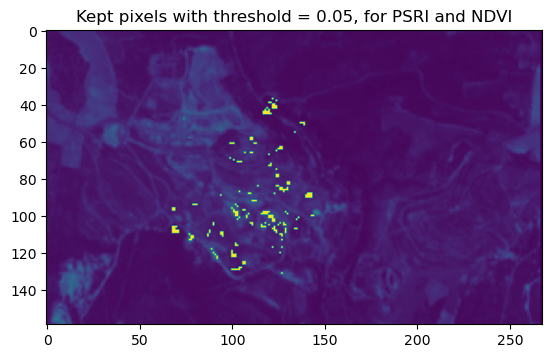

Le nombre de pixels gardés par addition des indices, avec threshold = 0.05, est de : 236


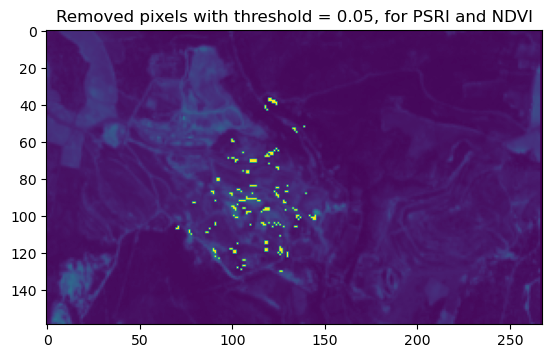

Le nombre de pixels supprimés par addition des indices, avec threshold = 0.05, est de : 210


In [263]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    k=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if not((coord_2_kept_float_psri[i][0][j]==0.0)or(coord_2_kept_float[i][0][j]==0.0)):
                k+=1
                data[2,int(coord_2_kept_float_psri[i][0][j]),int(coord_2_kept_float_psri[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for PSRI and NDVI")
        plt.show()
    print("Le nombre de pixels gardés par addition des indices, avec threshold = 0.05, est de :",k) 

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    k=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge[i])):
            if (coord_2_kept_float_psri[i][0][j]==0.0)or(coord_2_kept_float[i][0][j]==0.0):
                k+=1   
                if (coord_2_kept_float_psri[i][0][j]==0.0):
                    data[2,int(coord_2_removed_float_psri[i][0][j]),int(coord_2_removed_float_psri[i][1][j])]=1 
                else :
                    data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
                    
                
    profile = src.profile
    profile.update(count =1)
 
    # On écrit les nouvelles données dans un nouveau fichier raster
    
    with rasterio.open('Addition_NDVI_PSRI_05.tif', 'w', **src.profile) as dst:
        dst.write(data)
        
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('Addition_NDVI_PSRI_05.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for PSRI and NDVI")
        plt.show()
    print("Le nombre de pixels supprimés par addition des indices, avec threshold = 0.05, est de :",k) 

In [264]:
k=0
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        if (coord_2_kept_float_psri[i][0][j]==0.0)&(coord_2_kept_float[i][0][j]==0.0):
             k+=1   
print(k)        
f=round(100*(k/61),3)
print("Avec un threshold de 0.05, 46 pixels en communs sont supprimés pour le NDVI et le PSRI")
print("Ainsi sur 61 pixels supprimés au total pour le PSRI avec ce même threshold, {:.2f} % des pixels supprimés par le PSRI le sont aussi par le NDVI".format(f))

16
Avec un threshold de 0.05, 46 pixels en communs sont supprimés pour le NDVI et le PSRI
Ainsi sur 61 pixels supprimés au total pour le PSRI avec ce même threshold, 26.23 % des pixels supprimés par le PSRI le sont aussi par le NDVI


In [265]:
X_indices_combines=[]
Y_indices_combines=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge[i])):
        if (coord_2_kept_float_psri[i][0][j]==0.0)&(coord_2_kept_float[i][0][j]==0.0):
            X_indices_combines.append(coord[i][0][j])
            Y_indices_combines.append(coord[i][1][j])
print(X_indices_combines)
print(Y_indices_combines)

[100, 104, 96, 96, 96, 97, 98, 130, 122, 93, 100, 86, 124, 70, 70, 70]
[142, 120, 118, 119, 120, 117, 116, 127, 91, 129, 101, 104, 107, 103, 110, 111]


In [266]:
with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq', 'r') as rst:
    listedesclasses=[]
    for index, row in gdf.iterrows():
        multipolygon= row['Class']
        vals = rst.sample([(multipolygon)])
        listedesclasses.append(multipolygon)
        
ndvi16_classe_0=[]
ndvi16_classe_1=[]
ndvi16_classe_2=[]
ndvi16_classe_3=[]
ndvi16_classe_4=[]
ndvi16_classe_5=[]
ndvi16_classe_6=[]
ndvi20_classe_0=[]
ndvi20_classe_1=[]
ndvi20_classe_2=[]
ndvi20_classe_3=[]
ndvi20_classe_4=[]
ndvi20_classe_5=[]
ndvi20_classe_6=[]

listedesclasses2=np.copy(coord)
for i in range(79):
    for j in range(len(listedesclasses2[i][0])):
        listedesclasses2[i][0][j]=listedesclasses2[i][1][j]=listedesclasses[i]
        if (coord_2_kept_float[i][0][j]==0):
            listedesclasses2[i][0][j]=listedesclasses2[i][1][j]=0
            ndvi16_classe_0.append(ndvi16_2_float[i][0][j])
            ndvi20_classe_0.append(ndvi20_2_float[i][0][j])
        if listedesclasses2[i][0][j]==1:
            ndvi16_classe_1.append(ndvi16_2_float[i][0][j])
            ndvi20_classe_1.append(ndvi20_2_float[i][0][j])  
        if listedesclasses2[i][0][j]==2:
            ndvi16_classe_2.append(ndvi16_2_float[i][0][j])
            ndvi20_classe_2.append(ndvi20_2_float[i][0][j])
        if listedesclasses2[i][0][j]==3:
            ndvi16_classe_3.append(ndvi16_2_float[i][0][j])
            ndvi20_classe_3.append(ndvi20_2_float[i][0][j])
        if listedesclasses2[i][0][j]==4:
            ndvi16_classe_4.append(ndvi16_2_float[i][0][j])
            ndvi20_classe_4.append(ndvi20_2_float[i][0][j])
        if listedesclasses2[i][0][j]==5:
            ndvi16_classe_5.append(ndvi16_2_float[i][0][j])
            ndvi20_classe_5.append(ndvi20_2_float[i][0][j])
        if listedesclasses2[i][0][j]==6:
            ndvi16_classe_6.append(ndvi16_2_float[i][0][j])
            ndvi20_classe_6.append(ndvi20_2_float[i][0][j])
#print(len(ndvi16_float_0)+len(ndvi16_float_1)+len(ndvi16_float_2)+len(ndvi16_float_3)+len(ndvi16_float_4)+len(ndvi16_float_5)+len(ndvi16_float_6))         
#print(ndvi16_classe_0)
#print(listedesclasses2)

In [268]:
CLASSE_PIXELS_SUPPRIMES=[]
for i in range(len(ndvi16_classe_0)):
    CORR=[]
    ndvi16_classe_1.append(ndvi16_classe_0[i])
    ndvi20_classe_1.append(ndvi20_classe_0[i])
    ndvi16_classe_2.append(ndvi16_classe_0[i])
    ndvi20_classe_2.append(ndvi20_classe_0[i])
    ndvi16_classe_3.append(ndvi16_classe_0[i])
    ndvi20_classe_3.append(ndvi20_classe_0[i])
    ndvi16_classe_4.append(ndvi16_classe_0[i])
    ndvi20_classe_4.append(ndvi20_classe_0[i])
    ndvi16_classe_5.append(ndvi16_classe_0[i])
    ndvi20_classe_5.append(ndvi20_classe_0[i])
    ndvi16_classe_6.append(ndvi16_classe_0[i])
    ndvi20_classe_6.append(ndvi20_classe_0[i])
    Corr_matrixNDVI1=np.corrcoef(ndvi16_classe_1,ndvi20_classe_1)
    CorrNDVI1=round(Corr_matrixNDVI1[0,1],3)
    Corr_matrixNDVI2=np.corrcoef(ndvi16_classe_2,ndvi20_classe_2)
    CorrNDVI2=round(Corr_matrixNDVI2[0,1],3)
    Corr_matrixNDVI3=np.corrcoef(ndvi16_classe_3,ndvi20_classe_3)
    CorrNDVI3=round(Corr_matrixNDVI3[0,1],3)
    Corr_matrixNDVI4=np.corrcoef(ndvi16_classe_4,ndvi20_classe_4)
    CorrNDVI4=round(Corr_matrixNDVI4[0,1],3)
    Corr_matrixNDVI5=np.corrcoef(ndvi16_classe_5,ndvi20_classe_5)
    CorrNDVI5=round(Corr_matrixNDVI5[0,1],3)
    Corr_matrixNDVI6=np.corrcoef(ndvi16_classe_6,ndvi20_classe_6)
    CorrNDVI6=round(Corr_matrixNDVI6[0,1],3)
    CORR.append(CorrNDVI1)
    CORR.append(CorrNDVI2)
    CORR.append(CorrNDVI3)
    CORR.append(CorrNDVI4)
    CORR.append(CorrNDVI5)
    CORR.append(CorrNDVI6)
    classe = CORR.index(max(CORR)) +1
    CLASSE_PIXELS_SUPPRIMES.append(classe)
    del(ndvi16_classe_1[-1])
    del(ndvi20_classe_1[-1])
    del(ndvi16_classe_2[-1])
    del(ndvi20_classe_2[-1])
    del(ndvi16_classe_3[-1])
    del(ndvi20_classe_3[-1])
    del(ndvi16_classe_4[-1])
    del(ndvi20_classe_4[-1])
    del(ndvi16_classe_5[-1])
    del(ndvi20_classe_5[-1])
    del(ndvi16_classe_6[-1])
    del(ndvi20_classe_6[-1])
    
print(CLASSE_PIXELS_SUPPRIMES)

[5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 3, 5, 3, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 3, 5, 5, 5, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 3, 5, 5, 3, 3, 5, 3, 5, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 3, 3, 5, 3, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 3, 5, 3, 3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 3, 5, 5, 5]


Sortir un masque qgis pour différents seuils pour voir celui qui détecte le mieux les changements.
Comparer si on fait avec le PSRI si ce sont les mêmes pixels supprimés.
Comparer avec les différents dates.
Fixer un seuil d'abord.
Suprimer les pixels dans la base de données.
Laisser pixel par pixel.

Faire apprentissage sur 2020, faire l'évaluation sur 2016 pour vérifier.